# INTRODUCCIÓN

La música es, probablemente, la expresión artística más extensa, diversificada y consumida de todas. Y es también, por lógica, una industria gigantesca. Las formas y patrones de consumo han ido variando a lo largo de la historia: desde las percusiones tribales de los primeros homínidos hasta el día de hoy, donde escuchamos música con cualquier dispositivo electrónico mediante aplicaciones inteligentes como Spotify y Tidal, el ser humano y su música han recorrido un largo camino.

# MOTIVACIÓN. AUDIENCIA. METADATA. PROBLEMA DE NEGOCIO. PREGUNTAS DE INTERÉS. HIPÓTESIS

## Motivación

El objetivo que este trabajo se propone es predecir el género musical de una canción entre 11 clases diferentes, a partir de una serie de características musicales –variables- que una canción posee. Se intentará aplicar en el entorno de Python una serie de modelos de predicción incluidos en las librerías de Scikit learn.

## Audiencia

El proyecto está pensado para que sirva como herramienta práctica que brinde soluciones concretas en la creación de playlists, de modo que se piensa fundamentalmente en una audiencia de nivel operativo y/o táctico.

## Problema de negocio

El modelo se piensa como una herramienta de utilidad en diferentes ámbitos vinculados a la industria musical. Particularmente, se propone servir como parte dentro de un proceso de generación de playlists en aplicaciones musicales, dado que dicho sistema de múltiples playlists se constituye hoy en día como la principal forma en la que se reproduce (y promociona, claro) la música, de manera tal que cuando un artista o una distribuidora de música lance y publique una producción musical en alguna aplicación (Spotify, TIDAL, etc.), luego la misma pueda ser catalogada e incluida en diferentes playlists de manera asertiva y coherente de forma automática mediante un modelo algorítmico que prediga dicha clase musical.

## Metadata

El dataset elegido es el siguiente:
https://www.kaggle.com/datasets/purumalgi/music-genre-classification
Contiene 3 archivos: train.csv, test.csv y submission.csv.  Sin embargo y dado que se trata de un dataset para competencias, en este caso particular sólo se trabajará con el archivo train.csv.
 El archivo de entrenamiento y ajuste del modelo, es decir train.csv, posee 17.996 registros y 17 columnas. Los registros poseen información sobre el nombre de artista y de la canción y una serie variables inherentes a sus características y, finalmente, la variable “Class” que será nuestra variable target.
Los tipos de variables son los siguientes:
dtypes: float64(12), int64(3), object(2)



## Preguntas de interés. Hipótesis

-	¿Existe relación entre el género musical de una canción y sus diferentes características musicales?
-	¿Hay géneros musicales más populares que otros? ¿Cuáles serían?
-	¿Qué características comparten entre sí los diferentes géneros?
-	¿Se pueden determinar patrones?

En ese sentido, se proponen las siguientes hipótesis:
-	El rock el género con más energía
-	La gente prefiere escuchar canciones alegres y bailables
-	EL pop es el género con mayor popularidad
-	El hip hop tiene alta vocabularidad
-	El género “acústico” es el que arroja mayores valores de “acusticidad”




# DATA ACQUISITION

Comenzamos importando las librerías y aplicaciones necesarias para desarrollar el proyecto

In [1]:
!pip install missingno #instalamos la api necesaria

Se importan las librerías a utilizar:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import scipy as sp
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')

Se monta el archivo de tipo csv a partir de los archivos descargados

In [3]:
df=pd.read_csv('/content/train.csv')

# DATA WRANGLING

Se da comienzo al proceso de Data Wrangling a partir del estudio de la estructura del dataset.

In [4]:
df.shape

(17996, 17)

El dataset contiene 17.996 registros (filas) y 17 variables (columnas), de las cuales 16 serán, a priori, variables dependientes y 1 dependiente.

In [5]:
df.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849   0.8990  134.071            234596.0   
1          0.004010    0.1010   0.5690  116.454            251733.0   
2          0.000196    0.3940   0.7870  147.681            109667.0   
3               NaN    0.1220   0.5690  107.033            173968.0   
4          0.016100    0.1720   0.0918  199.060            229960.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

Se observan las 17 variables, sus nombres, su cantidad de datos nulos y el tipo de archivo del que se componen.

In [7]:
df.describe().round(3).T

count        mean         std     min         25%  \
Popularity          17568.0      44.512      17.427   1.000      33.000   
danceability        17996.0       0.543       0.166   0.060       0.432   
energy              17996.0       0.663       0.235   0.000       0.509   
key                 15982.0       5.952       3.197   1.000       3.000   
loudness            17996.0      -7.911       4.049 -39.952      -9.538   
mode                17996.0       0.637       0.481   0.000       0.000   
speechiness         17996.0       0.080       0.084   0.022       0.035   
acousticness        17996.0       0.247       0.311   0.000       0.004   
instrumentalness    13619.0       0.178       0.304   0.000       0.000   
liveness            17996.0       0.196       0.159   0.012       0.098   
valence             17996.0       0.486       0.240   0.018       0.297   
tempo               17996.0     122.623      29.572  30.557      99.621   
duration_in min/ms  17996.0  200744.459  111989.127   0.502  166337.000   
time_signature      17996.0       3.924       0.362   1.000       4.000   
Class               17996.0       6.696       3.206   0.000       5.000   

                           50%         75%          max  
Popularity              44.000      56.000      100.000  
danceability             0.545       0.659        0.989  
energy                   0.700       0.860        1.000  
key                      6.000       9.000       11.000  
loudness                -7.016      -5.189        1.355  
mode                     1.000       1.000        1.000  
speechiness              0.047       0.083        0.955  
acousticness             0.081       0.434        0.996  
instrumentalness         0.004       0.200        0.996  
liveness                 0.129       0.258        1.000  
valence                  0.481       0.672        0.986  
tempo                  120.066     141.969      217.416  
duration_in min/ms  209160.000  252490.000  1477187.000  
time_signature           4.000       4.000        5.000  
Class                    8.000      10.000       10.000

Aquí ya podemos observar los valores mas importantes de estadística descriptiva de cada variable numérica: medidas de tendencia central, medidas de dispersión y cuartiles. Es importante remarcar que en este dataset ya se han encodeado las variables "key", "mode" y "time signature". Las mismas serían por naturaleza de tipo "object" (key representa la tonalidad - do, do sostenido, re, etc.-, mode muestra si la canción esta en modo menor o mayor, y time signature representa el tipo de compás - 3/4, 4/4, etc.). Dicho proceso de encodeo fue realizado, presumiblemente, mediante el sistema Label Encoder, el cual codifica dentro de una única columna y mediante una índice de números ascendente los valores categóricos a ser reemplazados.

In [8]:
df.describe(include='object')

Artist Name Track Name
count             17996      17996
unique             9149      15129
top     Backstreet Boys     Dreams
freq                 69          9

Aquí observamos ciertos indicadores de las dos variables categóricas

## Verificación de duplicados:

In [9]:
df.duplicated().sum()

0

Se observa que no existen registros duplicados en todo el dataset.

## Datos nulos

Procedemos con el tratamiento de valores nulos

In [10]:
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [11]:
pd.set_option('display.max_rows', None)
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

instrumentalness    24.322072
key                 11.191376
Popularity           2.378306
dtype: float64

Se observa que tres de las variables poseen datos nulos, 'Popularity', 'key' e 'instrumentalness'. Es importante darle un tratamiento a los mismos dado los problemas que acarrean, que van desde sesgos en la visualizacion e interpretación de datos a errores en la implementación de modelos predictivos.
Si bien la proporción de nulos de la variable "Popularity" es baja, no lo es en los casos de "instrumentalness" y de "key". Si bien en el caso de Popularity se podrían directamente eliminar los registros sin alterar el proceso de modelado -dado que son pocos registros-, a efectos de no perder información se decide proceder con un proceso de reemplazo o imputación que no implique la eliminación de los mismos.

<Axes: >

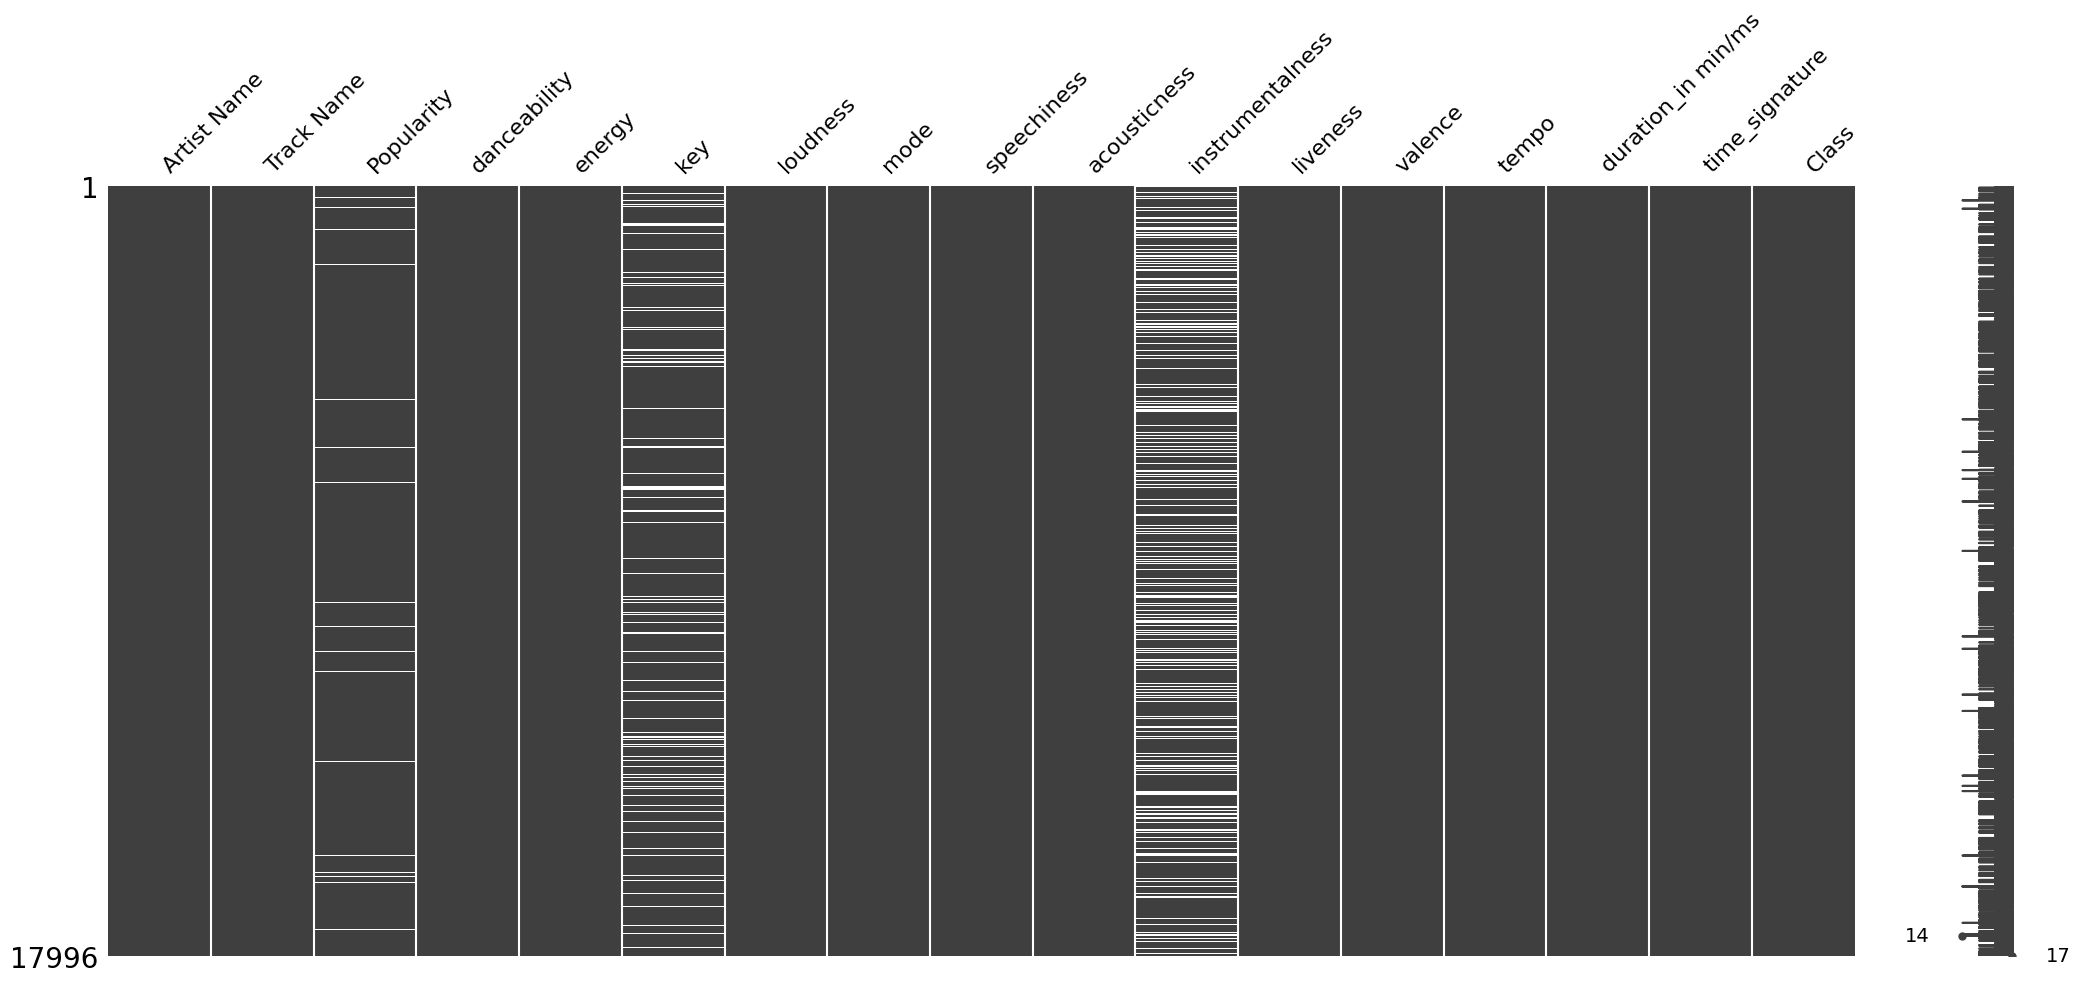

In [12]:
msno.matrix(df)

Se observa lo antes dicho: tres de las variables poseen datos nulos, 'Popularity', 'key' e 'instrumentalness'. La matriz nos permite observar el fenómeno de manera gráfica y simple.

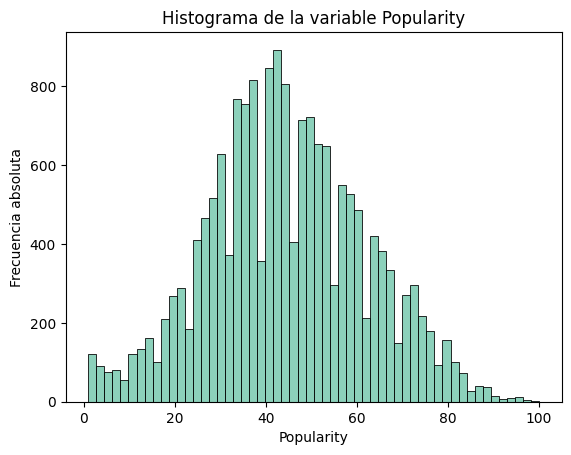

In [13]:
palette = sns.color_palette("Set2")
sns.set_palette(palette)
sns.histplot(df['Popularity'])
plt.title('Histograma de la variable Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frecuencia absoluta')
plt.show()

In [14]:
df.Popularity.mean()

44.51212431693989

In [15]:
df.Popularity.median()

44.0

En la variable se aprecia una distribución símetrica (corroborado por la comparación de sus valores de media y de mediana), de modo que se puede proceder a reemplazar valores nulos por la media sin afectar la variabilidad, pero tomando la misma dentro de cada género musical, utilizando el método Simple Imputer. Este método de reemplazo ofrece una mejor representación de la variabilidad de los datos, si lo comparamos con el procedimiento de tomar directamente la media de todo el dataset.

In [16]:
df_imputed = df.copy()

In [17]:
for genero in df['Class'].unique():
    imputer = SimpleImputer(strategy='mean')
    mask = df['Class'] == genero
    df_imputed.loc[mask, 'Popularity'] = imputer.fit_transform(df[mask][['Popularity']])

In [18]:
df_imputed.Popularity.isnull().sum()

0

Corrroborado que la función reemplaza adecuadamente, procedemos a reemplazar en el dataset original

In [19]:
for genero in df['Class'].unique():
    # Crear un SimpleImputer para cada género
    imputer = SimpleImputer(strategy='mean')  # Cambiar a 'median' para usar la mediana
    mask = df['Class'] == genero
    df.loc[mask, 'Popularity'] = imputer.fit_transform(df[mask][['Popularity']])

In [20]:
df.Popularity.isnull().sum()

0

Graficamos nuevamente:

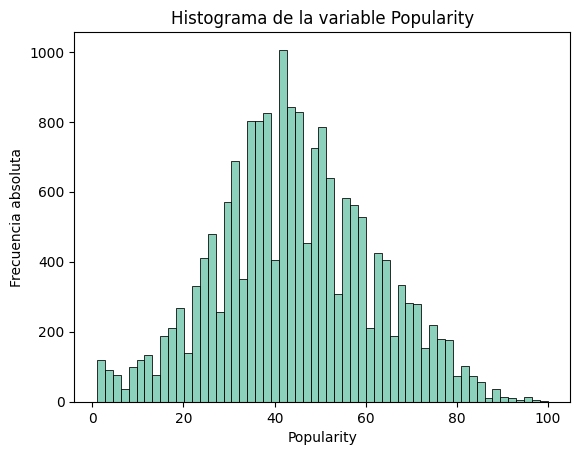

In [21]:
palette = sns.color_palette("Set2")
sns.set_palette(palette)
sns.histplot(df['Popularity'])
plt.title('Histograma de la variable Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frecuencia absoluta')
plt.show()

Se corroboran la ausencia de nulos y que no se vea afectada la distribución de la variable; si se observa, en cambio, el aumento de frecuencia en la media.

'key' es la representación de la tonalidad de una canción, de modo que si se toma como variable categórica podemos reemplazar datos nulos tomando la moda. A su vez, siendo pues una variable categórica "encodeada", conviene analazirla mediante un gráfico de barras.

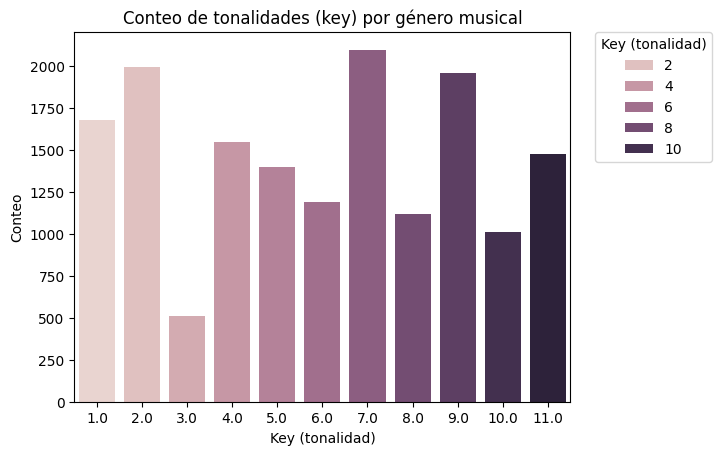

In [22]:
sns.countplot(x="key", data=df, hue='key')
plt.title('Conteo de tonalidades (key) por género musical')
legend=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
legend.set_title('Key (tonalidad)')
plt.xlabel('Key (tonalidad)')
plt.ylabel('Conteo')
plt.show()

Según se observa, la moda se encuentra en el valor 7, que se correponde con la tonalidad de Sol.

Estudiemos ahora que sucede con la variable 'key' si seccionamos el análisis por los diferentes géneros musicales posibles:

<function matplotlib.pyplot.show(close=None, block=None)>

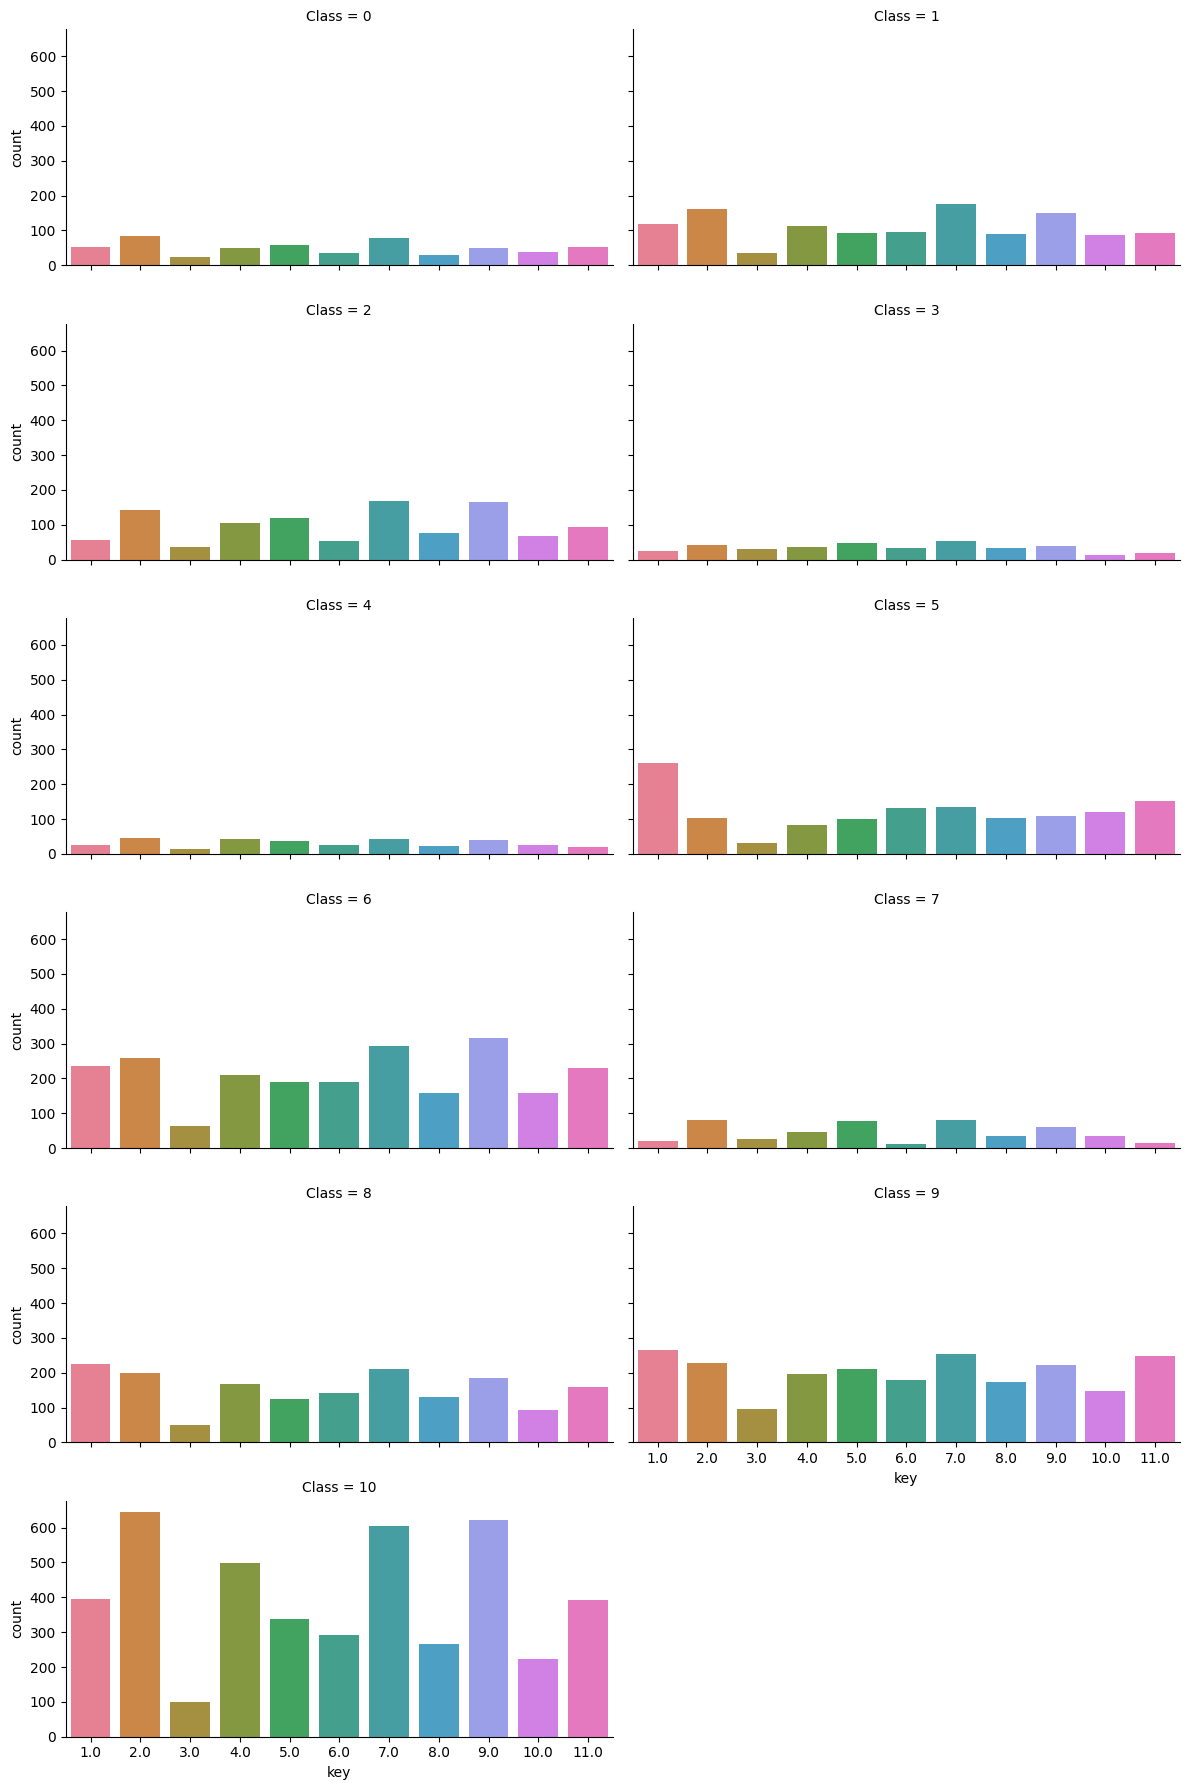

In [23]:
palette = sns.color_palette("Set2")
sns.set_palette(palette)
n = sns.FacetGrid(df, col="Class", margin_titles=True, col_wrap=2, aspect=2, hue='key', row_order=df['Class'].unique)
n.map(sns.countplot, "key")
plt.show

In [24]:
keygroup = df['key'].groupby(df['Class'])
keygroup.apply(lambda x: x.mode())

Class   
0      0    2.0
1      0    7.0
2      0    7.0
3      0    7.0
4      0    2.0
5      0    1.0
6      0    9.0
7      0    2.0
8      0    1.0
9      0    1.0
10     0    2.0
Name: key, dtype: float64

Vemos pues que, si bien la moda de todo el dataset es 7 (Sol), la misma varía considerablemente según se trate de cada género musical. De modo similar que en la variable Popularity, se aplica un método de reemplazo que considere la moda dentro de cada género musical. Vale recordar que se aplica la moda y no la media, dado que "key" es una variable categórica encodeadada, y por tanto la moda es la medida de tendencia central adecuada para el caso.

In [25]:
for genero in df['Class'].unique():
    imputer2 = SimpleImputer(strategy='median')
    mask = df['Class'] == genero
    df.loc[mask, 'key'] = imputer2.fit_transform(df[mask][['key']]).ravel()

In [26]:
df.key.isnull().sum()

0

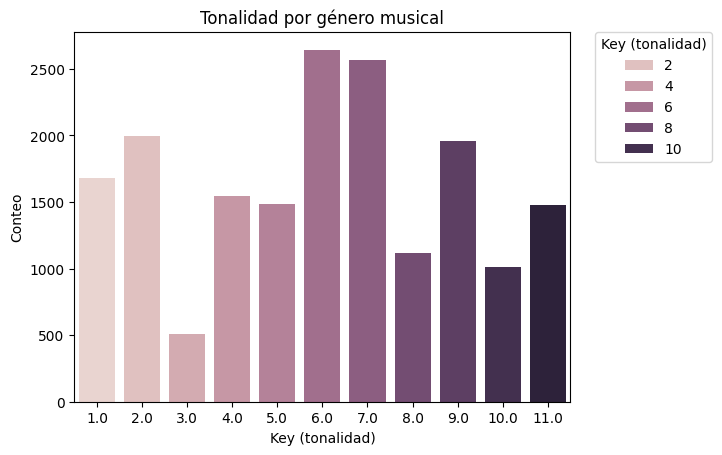

In [27]:
palette = sns.color_palette("Set2")
sns.set_palette(palette)
sns.countplot(x="key", data=df, hue='key')
legend=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
legend.set_title('Key (tonalidad)')
plt.title('Tonalidad por género musical')
plt.xlabel('Key (tonalidad)')
plt.ylabel('Conteo')
plt.show()

Como se puede observar, el proceso de reemplazo efectuado fue exitoso.

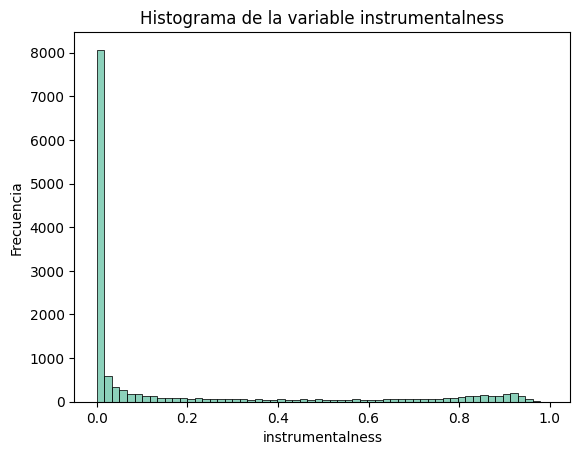

In [28]:
palette = sns.color_palette("Set2")
sns.set_palette(palette)
sns.histplot(df['instrumentalness'])
plt.title('Histograma de la variable instrumentalness')
plt.xlabel('instrumentalness')
plt.ylabel('Frecuencia')
plt.show()

In [29]:
df.instrumentalness.mean()

0.1775619253660327

In [30]:
df.instrumentalness.median()

0.00391

In [31]:
df.instrumentalness.mode()

0    0.000109
Name: instrumentalness, dtype: float64

El análisis de la distribución de la variable "instrumentalness" nos muestra una situación atípica, dado que la distribución es sesgada a derecha y a su vez la moda se encuentra en un valor extremo. Un análisis lógico de la variable que estamos tratando y su consecuente interpretación -0 indica canciones con mucha instrumentalidad y 1 canciones sin instrumentos- nos indica que probablemente corresponda aplicar la mediana a los valores nulos, dado que no se trata de outliers ó error de datos, sino que realmente se expresa un fenómeno real, la gran mayoría de los registros expresa un "instrumentalness" próximo a 0.

In [32]:
df['instrumentalness'].fillna(df['instrumentalness'].median(), inplace=True)

In [33]:
df.instrumentalness.isnull().sum()

0

Corroboramos gráficamente:

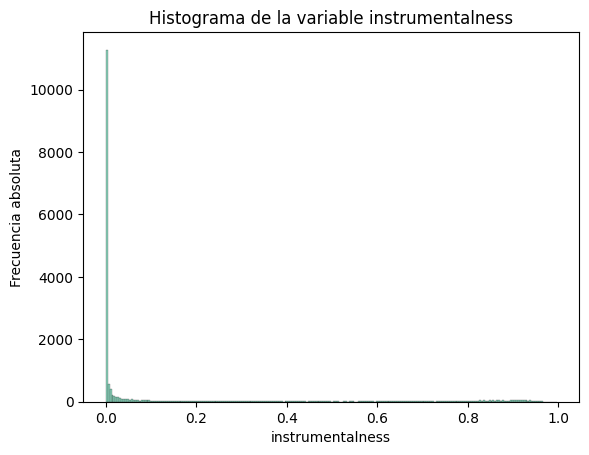

In [34]:
palette = sns.color_palette("Set2")
sns.set_palette(palette)
sns.histplot(df['instrumentalness'])
plt.title('Histograma de la variable instrumentalness')
plt.xlabel('instrumentalness')
plt.ylabel('Frecuencia absoluta')
plt.show()

Se observa que, posterior al proceso de reemplazo, la variable no cuenta con valores nulos y que la forma de su distribución no se vió significativamente afectada (si bien se observa claramente el aumento de la frecuencia de la mediana)

In [35]:
df.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

Se comprueba la ausencia de valores nulos.

# EXPLORATORY DATA ANALYSIS

## Análisis Univariado

El análisis comienza con un estudio de los principales medidas estadísitcas de cada variable. De acuerdo a la escala que abarcan y al tipo de variable se implementan diferentes gráficas:

 Primeramente se observa que existen variables con escalas muy discimiles, lo que obligará a efectuar, previo al modelado, un proceso de normalización.

Comenzamos separando todas las variables dependientes con escala 0 a 1:

In [36]:
dfuniv = df.drop(['key','mode', 'duration_in min/ms','tempo','Popularity', 'loudness','Class','time_signature'], axis=1)

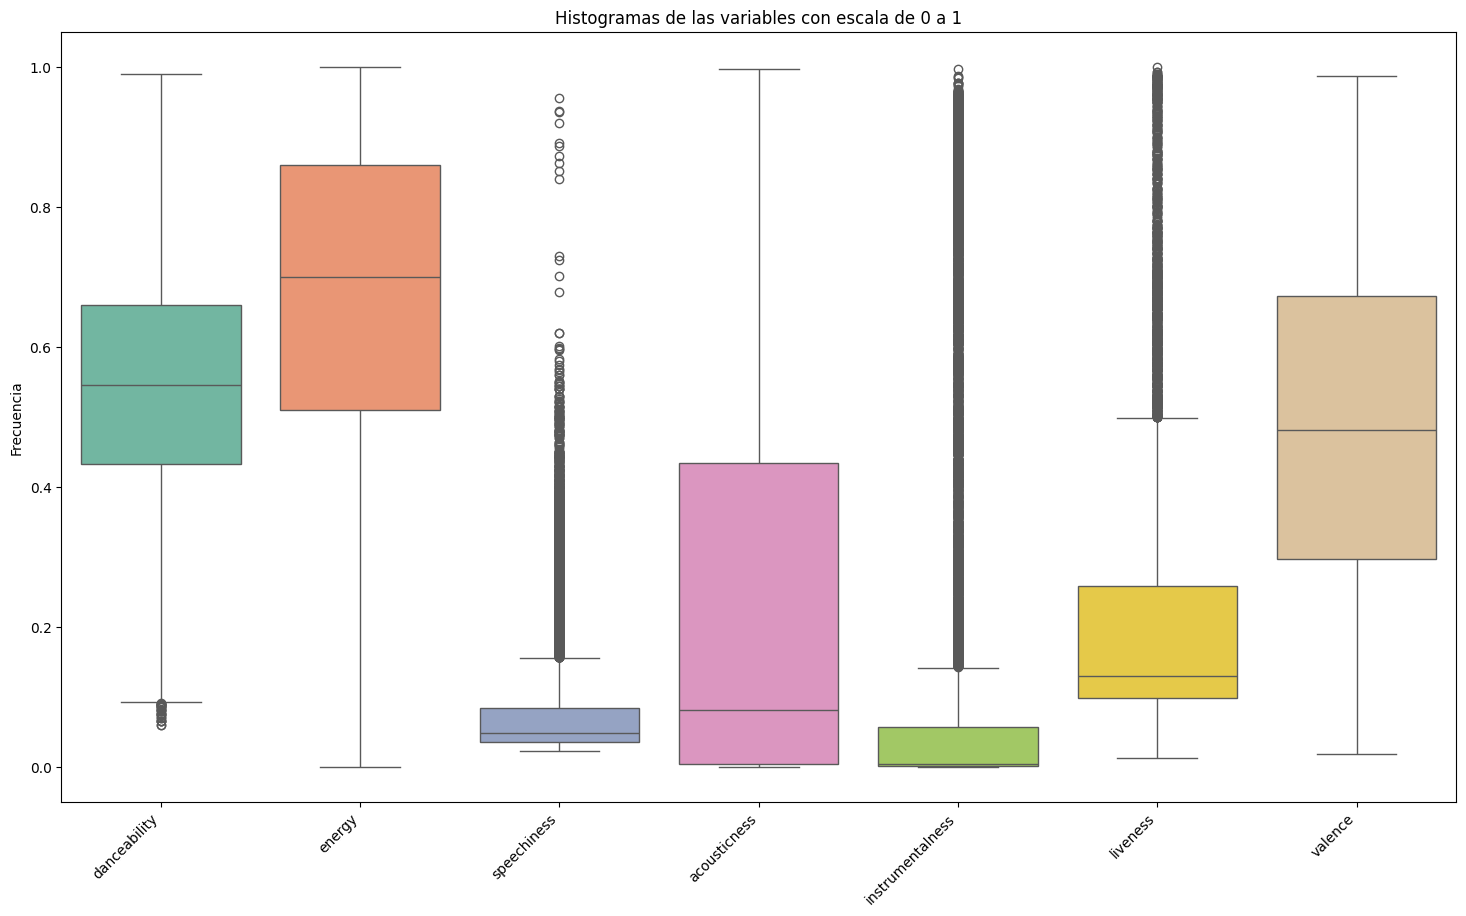

In [37]:
plt.figure(figsize=(18,10))
plt.title('Histogramas de las variables con escala de 0 a 1')
ax=sns.boxplot(data=dfuniv)
ax.set_ylabel('Frecuencia')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

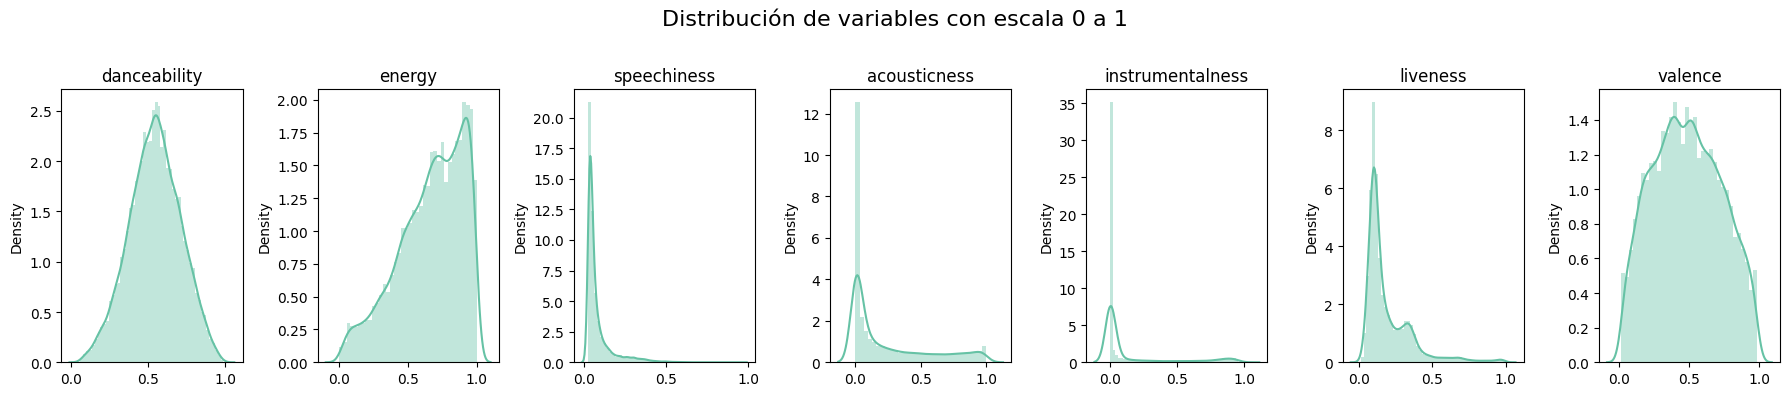

In [38]:
variables = ['danceability', 'energy', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence']

columns = 7

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(18,4))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(dfuniv[variable], ax=axes[j])
    axes[j].set_title(variable)
    axes[j].set_xlabel("")

fig.suptitle('Distribución de variables con escala 0 a 1', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

De lo osbervado en el conjunto de variables se infiere que:
- con excepción de las variables "danceability" y "valence", las demás no cuentan con una distribución simétrica.
-"specchiness", "acousticness", "instrumentalness" y "liveness" presentan sesgo a derecha y una dispersión fuerte, con un conjunto de outliers bastante alejados de sus valores medios.
- "energy" si bien muestra un sesgo a izquierda, parece tener una dispersión más contenida y no posee outliers.

Procedemos con la exploración de variables con escalas diferentes:

In [39]:
fig = px.box(df, x="duration_in min/ms")
fig.update_layout(title='Box Plot de "Duration in Minutes/Milliseconds"')
fig.show()

Se observa sesgo con cola derecha y que posee outliers muy por fuera del límite superior, denotando una dispersión alta.

In [40]:
fig = px.box(df, x="tempo")
fig.update_layout(title='Box Plot de "tempo"')
fig.show()

Aquí si bien existen valores outliers por debajo y por encima de los límites, dentro de los mismos la distribución tiende a ser normal.

In [41]:
fig = px.box(df, x="loudness")
fig.update_layout(title='Box Plot de "loudness"')
fig.show()

Aqui se osberva una distribución con un alto sesgo a la izquierda, con un valores muy por debajo del límite estadístico inferior definido por la figura.

Procedemos ahora con las variables categóricas, mediante gráficos de barras:

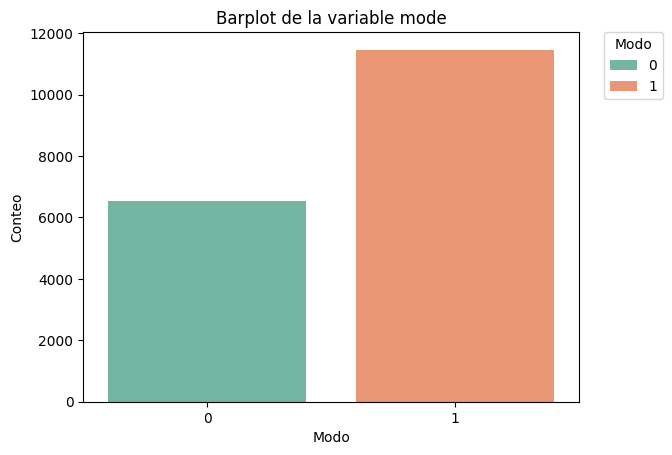

In [42]:
sns.countplot(x="mode", data=df, hue='mode')
plt.title('Barplot de la variable mode')
legend=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
legend.set_title('Modo')
plt.xlabel('Modo')
plt.ylabel('Conteo')
plt.show()

In [43]:
df['mode'].value_counts()

mode
1    11459
0     6537
Name: count, dtype: int64

Aqui se observa sencillamente que predominan las canciones en modos mayores, representados por el valor 1.

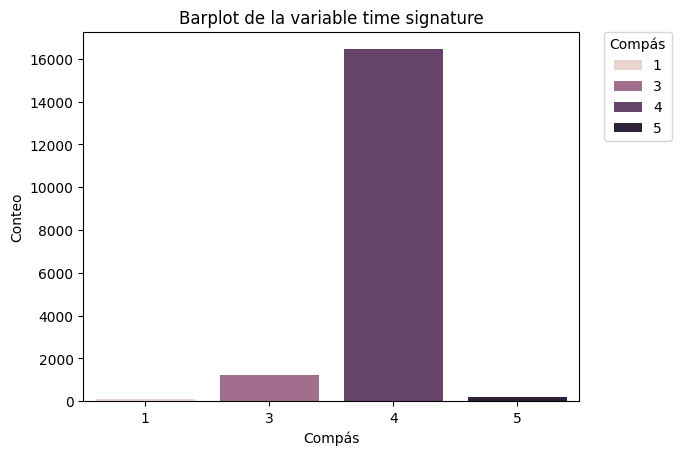

In [44]:
sns.countplot(x="time_signature", data=df, hue='time_signature')
plt.title('Barplot de la variable time signature')
legend=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
legend.set_title('Compás')
plt.xlabel('Compás')
plt.ylabel('Conteo')
plt.show()

In [45]:
df['time_signature'].value_counts()

time_signature
4    16451
3     1228
5      203
1      114
Name: count, dtype: int64

Se observa una predominancia muy marcada por el compás de 4/4, lo cual resulta bastante lógico en el contexto de la música actual; en segundo lugar observamos el valor 3 que representa un compás de 3/4.

### Análisis de variable target

In [46]:
df['Class'].value_counts()

Class
10    4949
6     2587
9     2524
8     1854
5     1447
1     1373
2     1272
0      625
7      576
3      402
4      387
Name: count, dtype: int64

In [47]:
df.Class.unique()

array([ 5, 10,  6,  2,  4,  8,  9,  3,  7,  1,  0])

In [48]:
df['Class'].isnull().sum()

0

Analizando la variable target del modelo observamos dos cuestiones importantes:
- posee un desbalance entre sus categóricos
- no posee valores nulos.

### Medidas de dispersión. Asimetría y Curtosis

In [49]:
sp.stats.describe(df.danceability)

DescribeResult(nobs=17996, minmax=(0.0596, 0.989), mean=0.5434332184929985, variance=0.027645207297692966, skewness=-0.08351496160434463, kurtosis=-0.2839897014411661)

Observamos pues que una desviación estándar de 0.16, los datos estan relativente próximos a la media. Un skew de -0.08 nos indica simetría en su forma. Por úlitmo, vemos que la kurtosis (indicador del achatamiento o elevación de una distribución) de -0.28 nos indica que es, si bien negativa, esta bastante próxima a una distribución normal.

In [50]:
sp.stats.describe(df.energy)

DescribeResult(nobs=17996, minmax=(2.03e-05, 1.0), mean=0.6627767470715714, variance=0.055400625612432274, skewness=-0.6611140008046469, kurtosis=-0.31718163059906335)

Se observa una desviación estándar en 0.23, lo cual indica una dispersión mayor. El skweness en -0.66 indica una asimetría moderada (a izquierda en este caso) y finalmente la kurtosis en -0.31 indica que la forma es levemente más achatada en relación a una distribució normal.

In [51]:
sp.stats.describe(df.speechiness)

DescribeResult(nobs=17996, minmax=(0.0225, 0.955), mean=0.07970699599911092, variance=0.006984958327824602, skewness=3.0877449599652707, kurtosis=12.664274900613043)

Aquí conviene resaltar una distribución claramente atípica, con un valor de skewness en 3.08 se verifica una marcada cola a la derecha; el valor de kurtosis en 12.66 indica que la campana es fuertemente más alta que en una distribución normal.

In [52]:
sp.stats.describe(df.acousticness)

DescribeResult(nobs=17996, minmax=(0.0, 0.996), mean=0.24708167183929763, variance=0.0964923868937078, skewness=1.1054048985892557, kurtosis=-0.17942258741395767)

Una desviación estándar en 0.31, sobre una escala que va de 0 a 1, habla de una gran dispersión. El skew, si bien no tanto como en el caso anterior, representa una figura asimétrica a derecha. La kurtosis en -0.17 refleja una campana levemente más baja que la campana normal (cuyo valor sería 0).

In [53]:
sp.stats.describe(df.instrumentalness)

DescribeResult(nobs=17996, minmax=(1e-06, 0.996), mean=0.1353261797932874, variance=0.07551031641513843, skewness=1.9726388214791952, kurtosis=2.3297063248925207)

La figura representa una forma sesgada a derecha, dado su valor de skewness. La forma de la campana es levemente más elevada que la de una distribución normal.

In [54]:
sp.stats.describe(df.liveness)

DescribeResult(nobs=17996, minmax=(0.0119, 1.0), mean=0.19616990442320514, variance=0.02534835570437542, skewness=2.1758907571153787, kurtosis=5.631498159513434)

El valor de skewness indica una asimetría marcada a la derecha. El valor de curtosis es elevado, de modo que la forma de la campana es bastante afilada.

In [55]:
sp.stats.describe(df.valence)

DescribeResult(nobs=17996, minmax=(0.0183, 0.986), mean=0.486208490775728, variance=0.057693760592531805, skewness=0.08992063151288378, kurtosis=-0.9160422645310748)

Aquí se observa una distribución prácticamente normal en todos sus indicadores.

In [56]:
sp.stats.describe(df['duration_in min/ms'])

DescribeResult(nobs=17996, minmax=(0.50165, 1477187.0), mean=200744.45885108635, variance=12541564595.462492, skewness=0.84685938212447, kurtosis=8.663752564692688)

Resalta en este caso la desviación estándar, indicando pues una dispersión muy fuerte. El skew es moderado, levemente asimétrico a derecha, y la curtosis exhibe un valor alto, es decir una campana muy elevada.

In [57]:
sp.stats.describe(df.tempo)

DescribeResult(nobs=17996, minmax=(30.557, 217.416), mean=122.62329400977995, variance=874.4752294584828, skewness=0.3795872531541212, kurtosis=-0.4474135345316812)

El skew en 0.37 indica una forma muy cercana a simétrica. La curtosis indica una campana de altura muy próxima a la normal.

In [58]:
sp.stats.describe(df.loudness)

DescribeResult(nobs=17996, minmax=(-39.952, 1.355), mean=-7.9106597577239395, variance=16.395623871058437, skewness=-1.7612366425831913, kurtosis=5.0360080067478865)

La desviación estándar es de 4.04, lo cual indica que existe dispersión. El skewness en -1.76 indica una asimetría a izquierda bastante marcada y, finalmente, la curtosis en 5.03 indica una forma de campana fuertemente elevada con colas débiles.

## Análisis Bivariado

### Correlaciones en general

Primeramente se genera un dataset que contiene únicamente las variables numéricas, a efectos de poder ejecutar la matriz de correlación.

In [59]:
numericos = df.select_dtypes(include=['number'])
matrix=numericos.corr()
matrix
#se utiliza el sistema de correlación por defecto (Pearson)

Popularity  danceability    energy       key  loudness  \
Popularity            1.000000      0.166317  0.053600  0.001948  0.125617   
danceability          0.166317      1.000000 -0.093838  0.007686  0.059723   
energy                0.053600     -0.093838  1.000000  0.016047  0.767869   
key                   0.001948      0.007686  0.016047  1.000000  0.004997   
loudness              0.125617      0.059723  0.767869  0.004997  1.000000   
mode                  0.016837     -0.067135 -0.035880 -0.103170 -0.033650   
speechiness           0.031476      0.199042  0.125427 -0.000021  0.096027   
acousticness         -0.127110      0.009055 -0.745963 -0.010274 -0.612824   
instrumentalness     -0.172393     -0.219255 -0.151817  0.000902 -0.348796   
liveness             -0.071257     -0.109485  0.195634  0.014719  0.112022   
valence               0.054610      0.444548  0.222998  0.033485  0.181086   
tempo                -0.005290     -0.183527  0.210224  0.014583  0.164272   
duration_in min/ms   -0.029143     -0.121624  0.245768  0.019253  0.172010   
time_signature        0.066639      0.137455  0.145281  0.006038  0.127775   
Class                 0.163445     -0.097681  0.217328 -0.013644  0.177872   

                        mode  speechiness  acousticness  instrumentalness  \
Popularity          0.016837     0.031476     -0.127110         -0.172393   
danceability       -0.067135     0.199042      0.009055         -0.219255   
energy             -0.035880     0.125427     -0.745963         -0.151817   
key                -0.103170    -0.000021     -0.010274          0.000902   
loudness           -0.033650     0.096027     -0.612824         -0.348796   
mode                1.000000    -0.074609      0.024035         -0.016565   
speechiness        -0.074609     1.000000     -0.086648         -0.100555   
acousticness        0.024035    -0.086648      1.000000          0.146809   
instrumentalness   -0.016565    -0.100555      0.146809          1.000000   
liveness           -0.001563     0.070406     -0.111393         -0.041411   
valence            -0.002986     0.053885     -0.122547         -0.223621   
tempo               0.021211     0.048948     -0.168318         -0.028771   
duration_in min/ms -0.069307     0.005044     -0.322583          0.036411   
time_signature     -0.019989     0.056237     -0.133936         -0.072357   
Class              -0.044740    -0.059349     -0.237138         -0.038072   

                    liveness   valence     tempo  duration_in min/ms  \
Popularity         -0.071257  0.054610 -0.005290           -0.029143   
danceability       -0.109485  0.444548 -0.183527           -0.121624   
energy              0.195634  0.222998  0.210224            0.245768   
key                 0.014719  0.033485  0.014583            0.019253   
loudness            0.112022  0.181086  0.164272            0.172010   
mode               -0.001563 -0.002986  0.021211           -0.069307   
speechiness         0.070406  0.053885  0.048948            0.005044   
acousticness       -0.111393 -0.122547 -0.168318           -0.322583   
instrumentalness   -0.041411 -0.223621 -0.028771            0.036411   
liveness            1.000000  0.021076  0.033515            0.053885   
valence             0.021076  1.000000  0.051128           -0.097126   
tempo               0.033515  0.051128  1.000000            0.045133   
duration_in min/ms  0.053885 -0.097126  0.045133            1.000000   
time_signature      0.021546  0.112479 -0.034642            0.007411   
Class               0.045309 -0.075116  0.031737            0.203678   

                    time_signature     Class  
Popularity                0.066639  0.163445  
danceability              0.137455 -0.097681  
energy                    0.145281  0.217328  
key                       0.006038 -0.013644  
loudness                  0.127775  0.177872  
mode                     -0.019989 -0.044740  
speechiness               0.056237 -0.059349  
acousticn

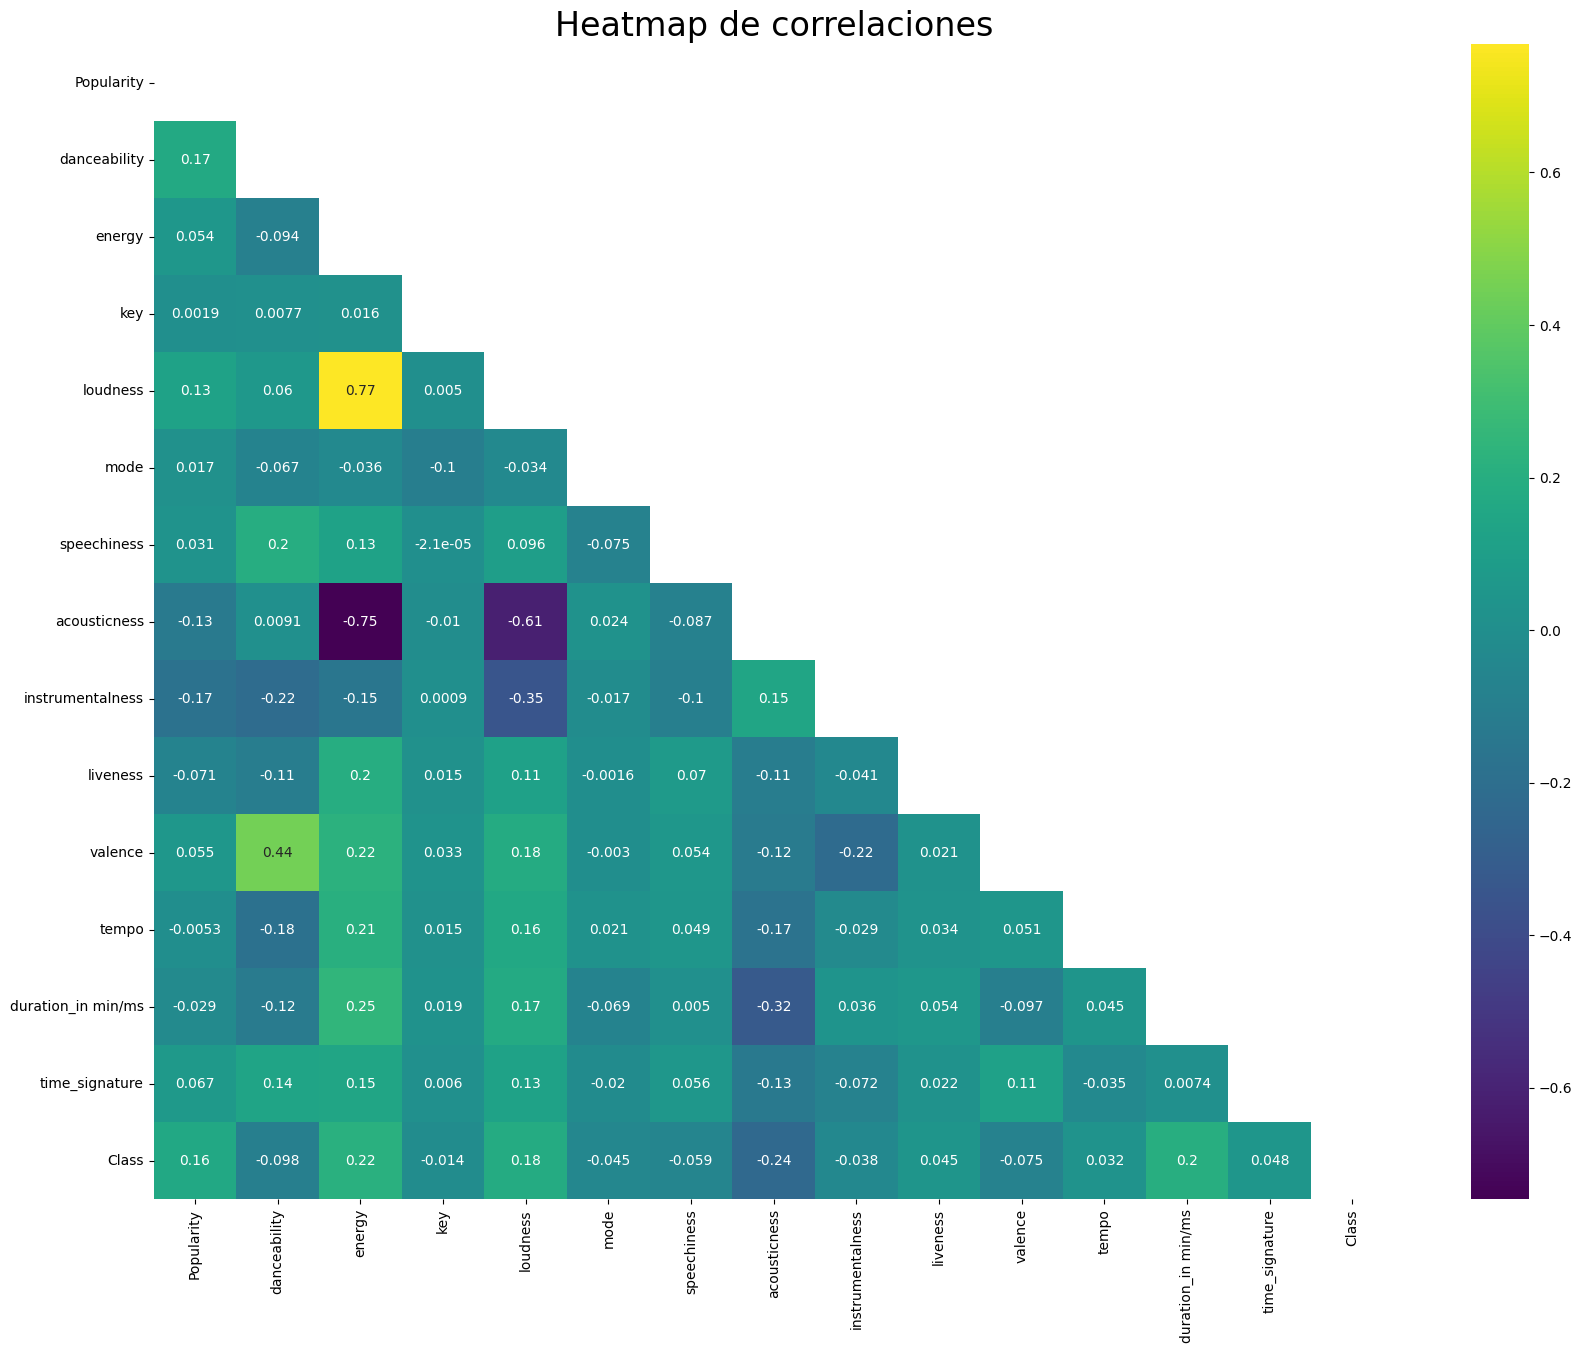

In [60]:
plt.rcParams['figure.figsize'] = (20, 15)
corr_matrix=numericos.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(numericos.corr(), mask=mask, annot = True, cmap='viridis')
plt.title('Heatmap de correlaciones', fontsize = 24)
plt.show()

El mapa de calor contiene la misma información que la matriz, pero facilita la lectura de la misma. Los resultados mas notorios son los siguientes:
- Se observa una correlación positiva fuerte entre "loudness" y "energy". Asi mismo, la variable "acousticness" muestra correlación negativa con "energy" y con "loudness".
El resultado obentido demandará que, previo a implementar el ajuste y entrenamiento de un modelo algorítimico, se analice la necesidad de eliminar alguna o algunas de las variables independientes correlacionadas, a efectos de mevitar la multicolinealidad.
- la variable target, "Class", no posee correlaciones fuertes con ninguna variable indepentiente. A su vez, posee casi nula correlación con "key". Dicho de otro modo, la tonalidad de las canciones no guarda relación con su género musical.

### Glosario de "Class"

A efectos de mejor interpretar las gráficas, se ofrece la siguiente información:

In [61]:
clases=pd.read_csv('/content/submission.csv') # A efectos de tener las referencia de Clase
clases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Acoustic/Folk_0  7713 non-null   int64
 1   Alt_Music_1      7713 non-null   int64
 2   Blues_2          7713 non-null   int64
 3   Bollywood_3      7713 non-null   int64
 4   Country_4        7713 non-null   int64
 5   HipHop_5         7713 non-null   int64
 6   Indie Alt_6      7713 non-null   int64
 7   Instrumental_7   7713 non-null   int64
 8   Metal_8          7713 non-null   int64
 9   Pop_9            7713 non-null   int64
 10  Rock_10          7713 non-null   int64
dtypes: int64(11)
memory usage: 663.0 KB


In [62]:
clases.head()

Acoustic/Folk_0  Alt_Music_1  Blues_2  Bollywood_3  Country_4  HipHop_5  \
0                1            0        0            0          0         0   
1                0            1        0            0          0         0   
2                0            0        1            0          0         0   
3                0            0        0            1          0         0   
4                0            0        0            0          1         0   

   Indie Alt_6  Instrumental_7  Metal_8  Pop_9  Rock_10  
0            0               0        0      0        0  
1            0               0        0      0        0  
2            0               0        0      0        0  
3            0               0        0      0        0  
4            0               0        0      0        0

### Correlaciones uno a uno

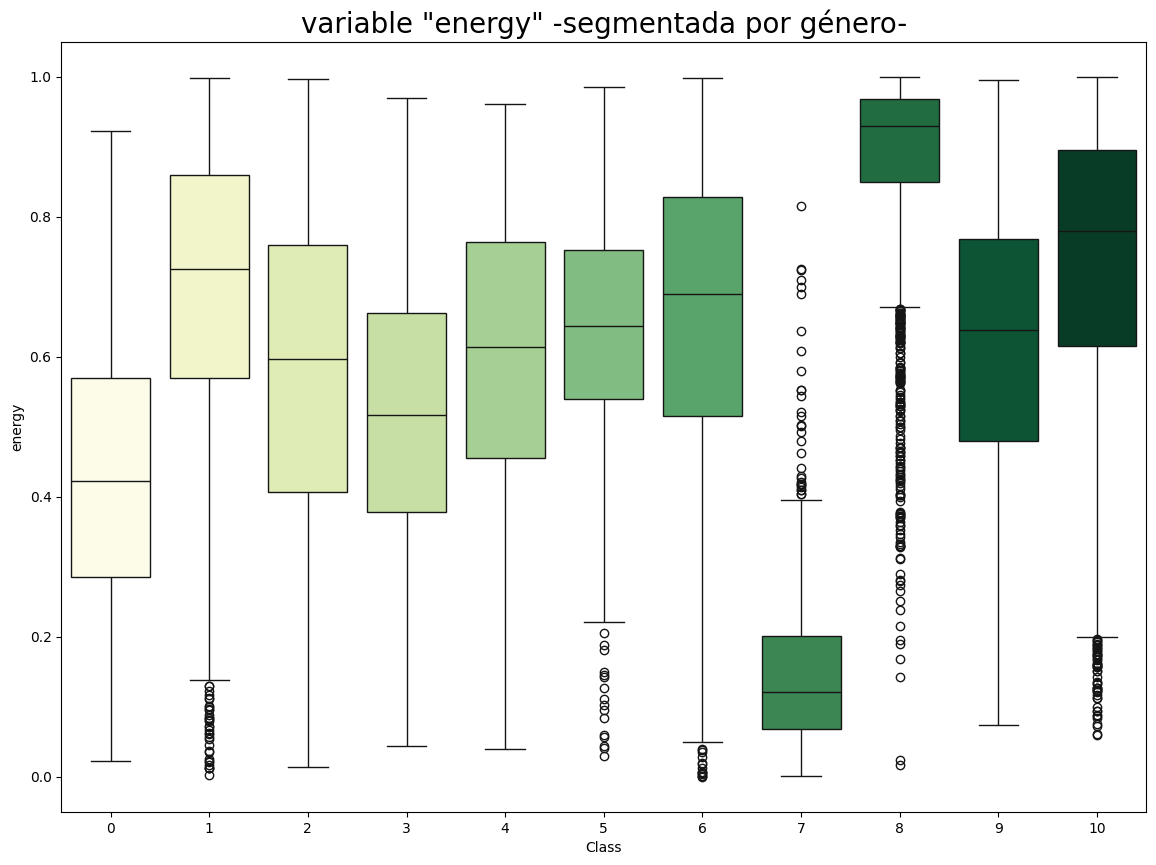

In [63]:
plt.rcParams['figure.figsize'] = (14,10)
sns.boxplot(x='Class', y='energy', data=numericos, palette = 'YlGn', hue='Class', legend=False)
plt.title('variable "energy" -segmentada por género-', fontsize = 20)
plt.show()

Se observa que, lógicamente, la variable "energy" muestra diferentes medidas de tendencia central y dispersión de acuero a cada género musical de que se trate. Los géneros "metal" y "rock" tienen los mayores valores de energy, seguidos por "alternativa".

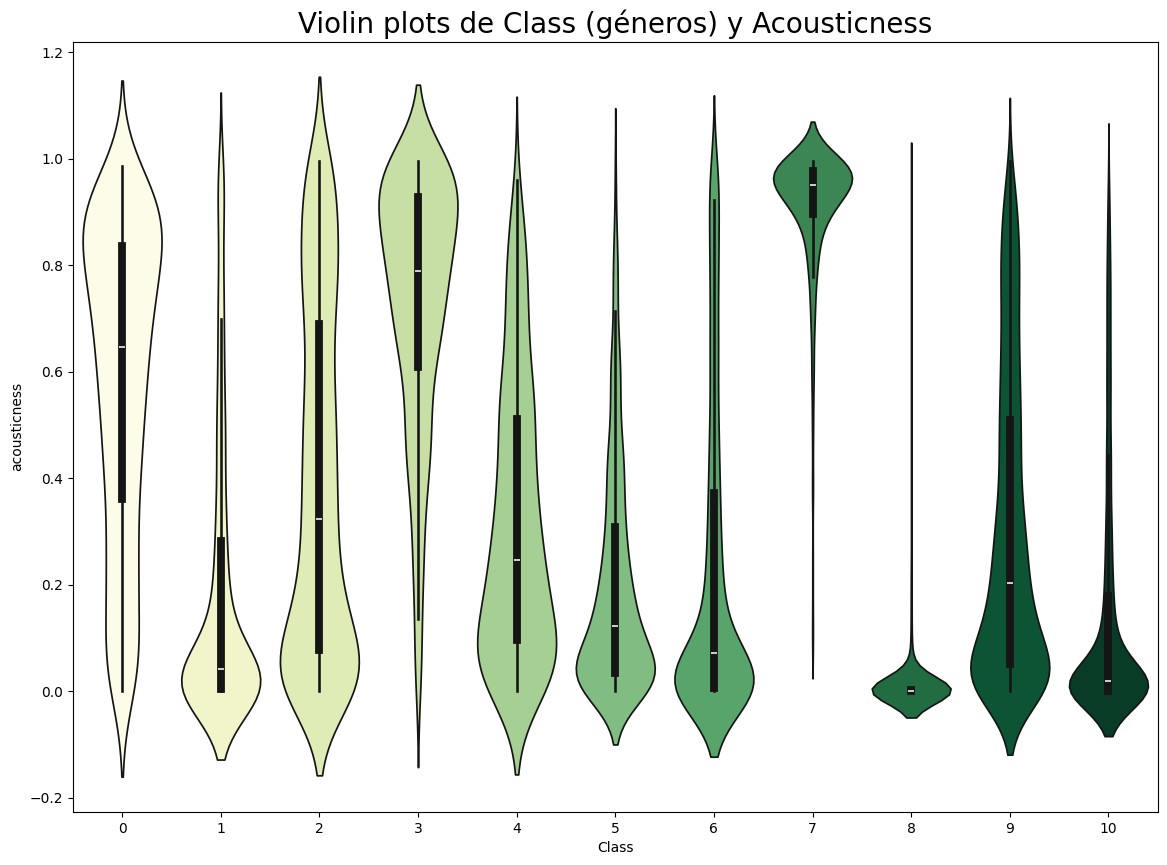

In [64]:
plt.rcParams['figure.figsize'] = (14,10)
sns.violinplot(x='Class',y='acousticness', data=numericos, palette = 'YlGn', hue='Class', legend=False)
plt.title('Violin plots de Class (géneros) y Acousticness', fontsize = 20, fontweight = 30)
plt.show()

Se puede observar que ciertos géneros musicales (0 -"acoustic"-, 3 -"Bollywood"- y 7- "instrumental"-) muestran valores altos de "acousticness" mientras otros, lógicamente, muestran valores bajos. Podemos observar las formas de la distribución y los valores resúmenes principales.

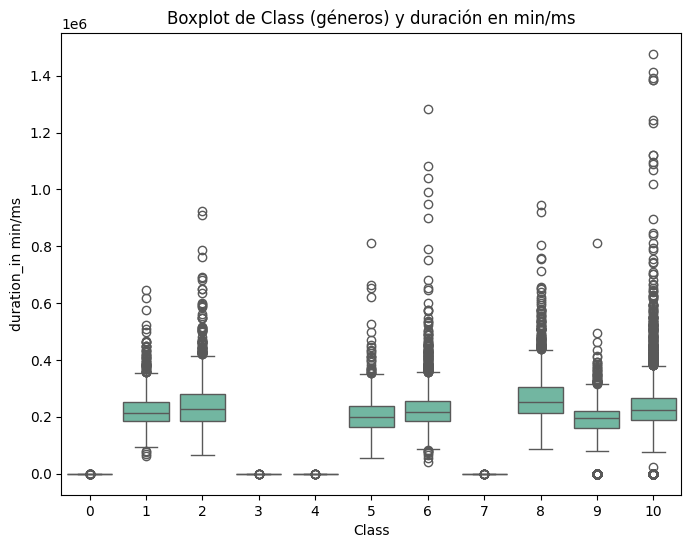

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='duration_in min/ms', data=numericos)
plt.title('Boxplot de Class (géneros) y duración en min/ms')
plt.show()

Se osberva que, si bien lógicamente la duración de las canciones no es un parámetro estandarizado en la composición musical, y que por tanto tendremos valores atípicos en cualquier género, existe un patrón de valores medios que transversaliza a los géneros 1, 2, 5, 6, 8, 9 y 10.
Se recomienda evaluar qué sucede con los demás géneros, es decir, determinar si existe un problema en los datos de origen o si bien se debe a algún fenómeno particular.

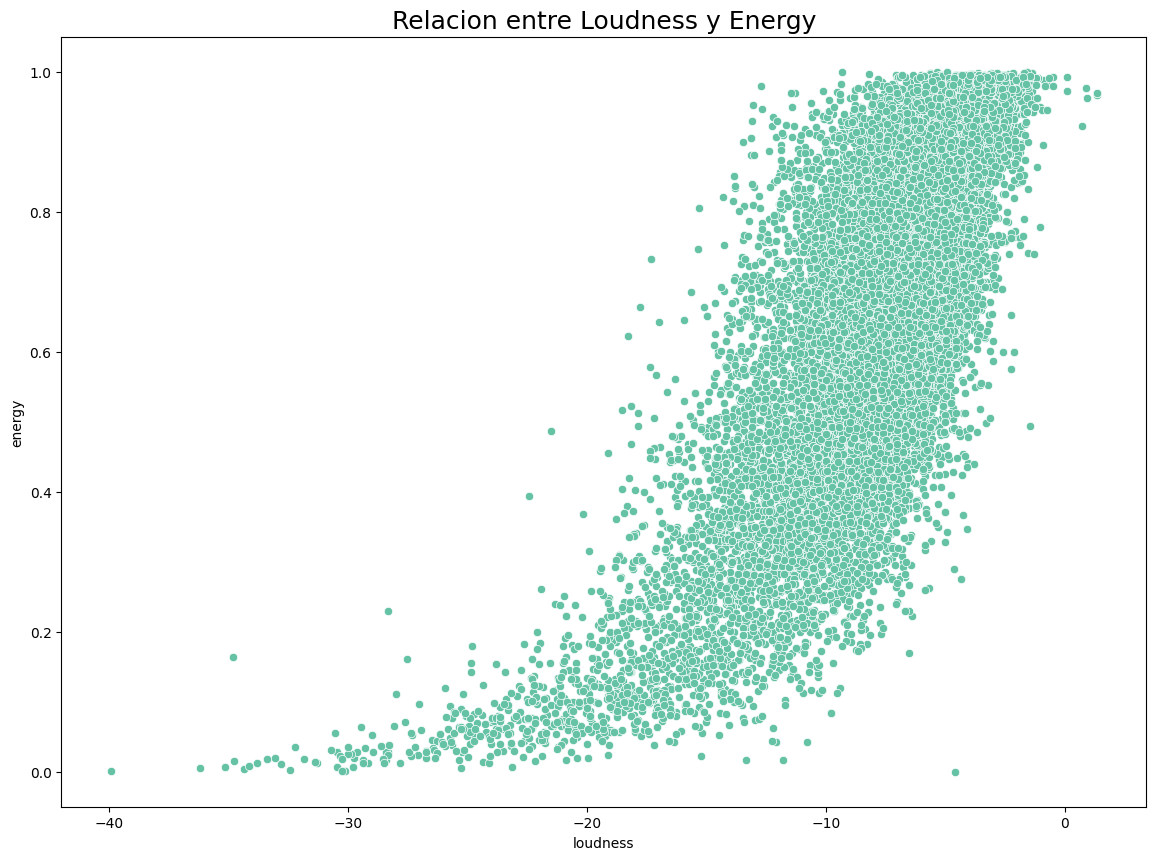

In [66]:
sns.scatterplot(x="loudness", y="energy", data=numericos)
plt.title('Relacion entre Loudness y Energy', fontsize = 18, fontweight = 30)
plt.show()

Se osberva, claramente, una acentuada correlación positiva entre estas dos variables. Esta situación de multicolinealidad debe ser resuelta previamente a implementar modelos de predicción.

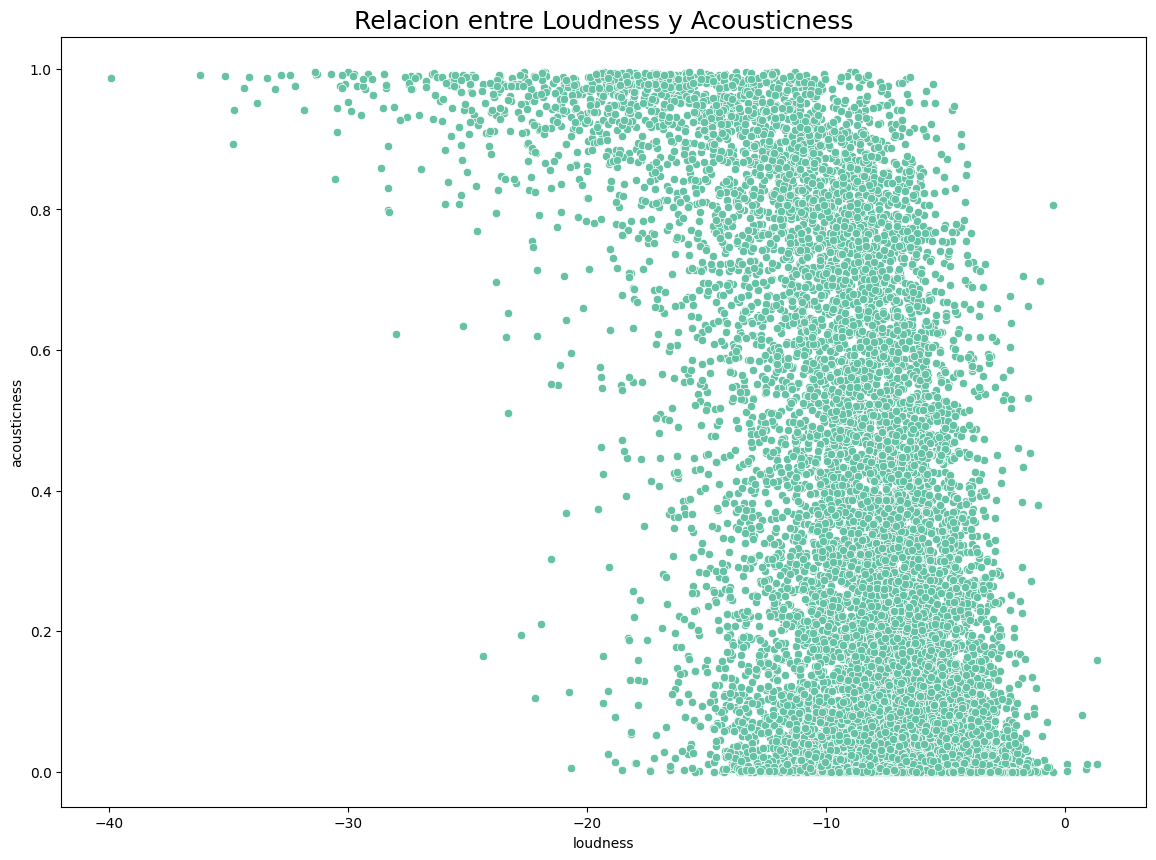

In [67]:
sns.scatterplot(x="loudness", y="acousticness", data=numericos)
plt.title('Relacion entre Loudness y Acousticness', fontsize = 18, fontweight = 30)
plt.show()

En este caso, en cambio, se observa que existe una correlación pero de tipo negativa: mientras más "ruidosa" son las canciones, menos "acústicas" son.

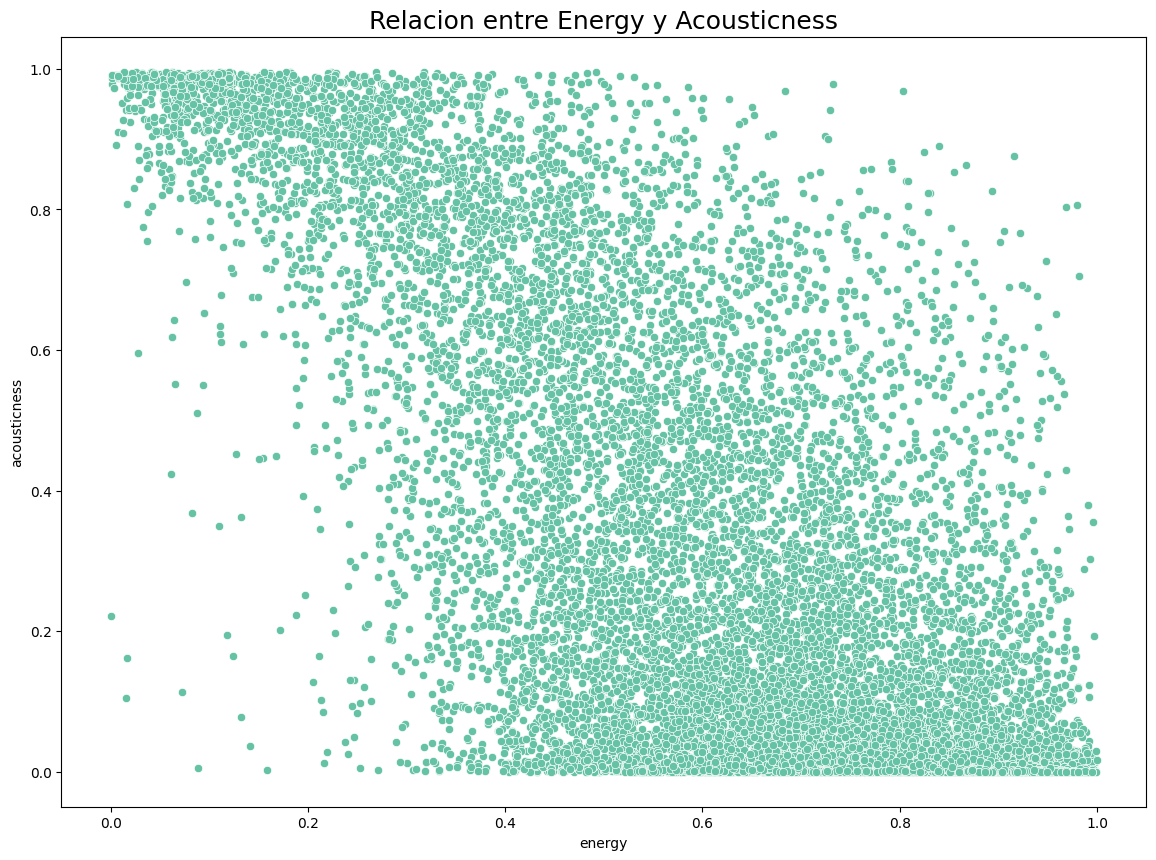

In [68]:
sns.scatterplot(x="energy", y="acousticness", data=numericos)
plt.title('Relacion entre Energy y Acousticness', fontsize = 18, fontweight = 30)
plt.show()

En este gráfico, se observa, de formar similar al anterior, una correlación negativa entre estas dos variables.

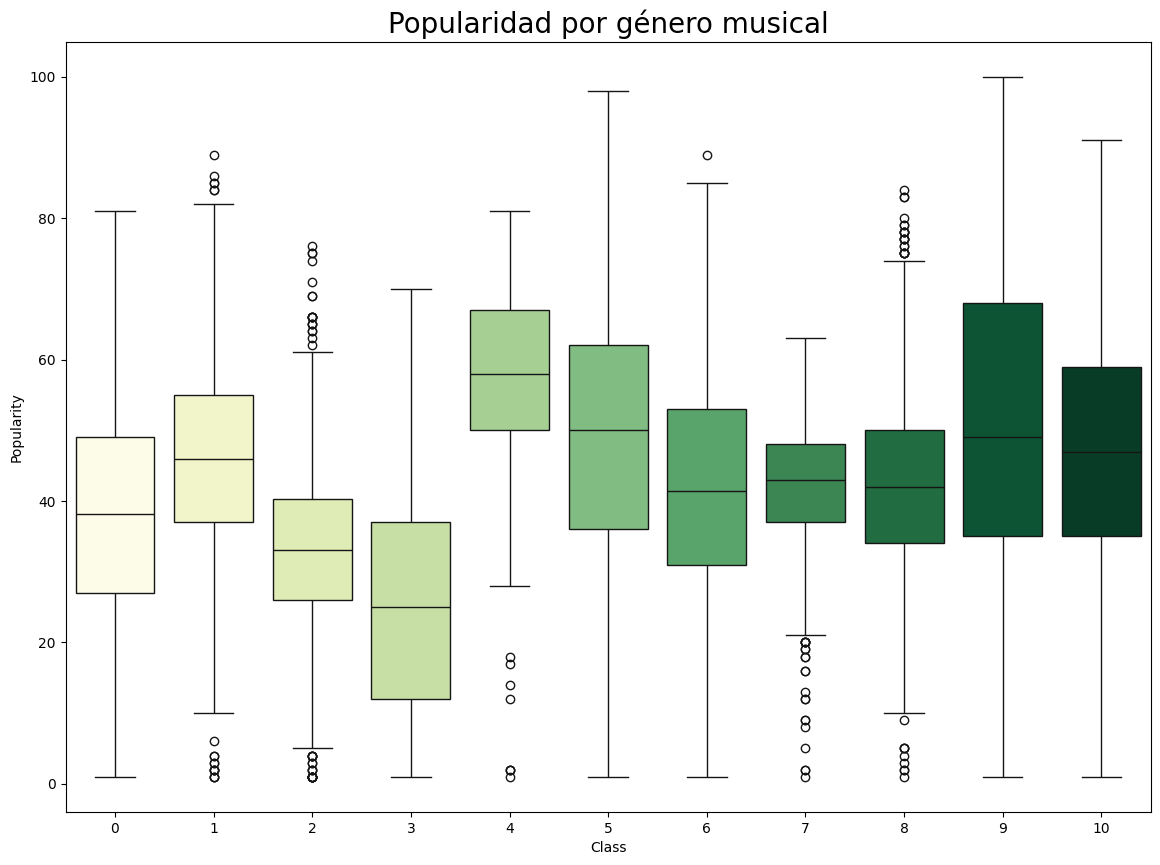

In [69]:
plt.rcParams['figure.figsize'] = (14,10)
sns.boxplot(x='Class', y='Popularity', data=numericos, palette = 'YlGn', hue='Class', legend=False)
plt.title('Popularidad por género musical', fontsize = 20)
plt.show()

Este gráfico nos muestra que si bien el género "Country" muestra mayor cantidad de registros en torno a las medidas de tendencia central y IQR más elevadas de todas las clases, "Hip Hop" y "Pop" son los géneros que alcanzan las cifras más altas de popularidad.

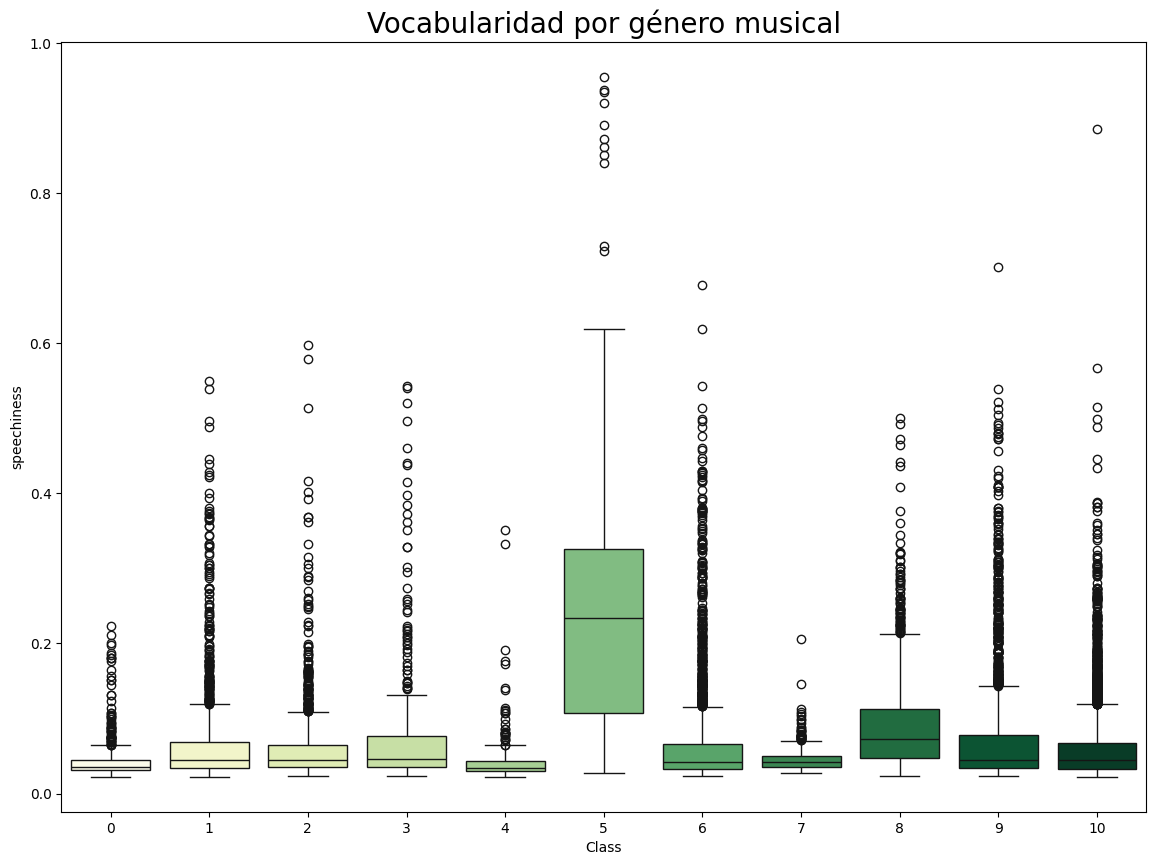

In [70]:
plt.rcParams['figure.figsize'] = (14,10)
sns.boxplot(x='Class', y='speechiness', data=df, palette = 'YlGn', hue='Class', legend=False)
plt.title('Vocabularidad por género musical', fontsize = 20)
plt.show()

Muy claramente, el género hip hop mantiene una alta vocuabularidad en comparación con los demás géneros.

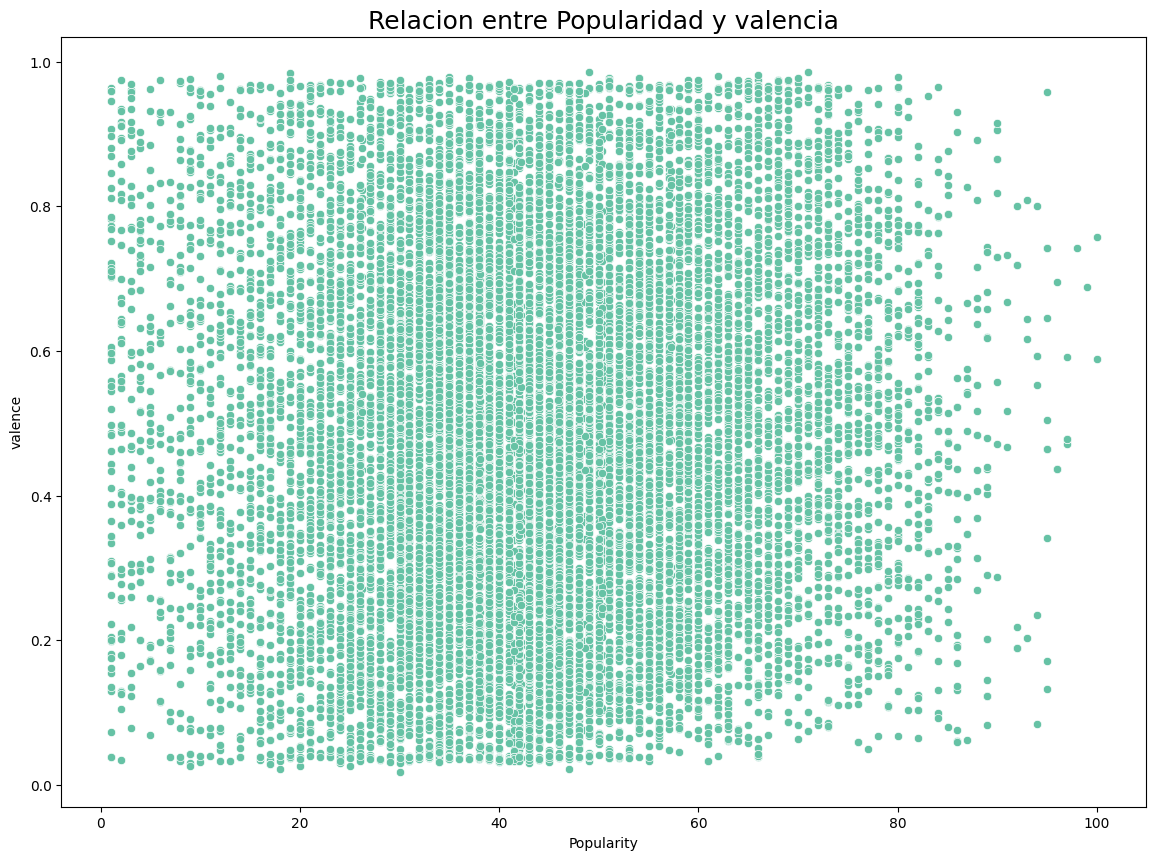

In [71]:
sns.scatterplot(x="Popularity", y="valence", data=numericos)
plt.title('Relacion entre Popularidad y valencia', fontsize = 18, fontweight = 30)
plt.show()

No se observa correlación clara entre ambas variables, es decir, la "positividad" de cierta canción no tiene mayor correlación con que dicha canción sea popular o no. Dicho de otro modo, podemos encontrar canciones populares que sean alegres y canciones populares que sean tristes.

Intentemos ver si existe relación entre la "key" (modo tonal) y el género musical (Class), mediante coeficientes adecuados para dos variables categóricas:

In [72]:
contingency_table = pd.crosstab(df['Class'], df['key'])

In [73]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [74]:
phi = np.sqrt(chi2 / df.shape[0])

In [75]:
print('Coeficiente Phi:', phi)

Coeficiente Phi: 0.29461960648469504


In [76]:
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))
print('V de Cramer:', cramer_v)

V de Cramer: 0.09316689998341501


De los resultados obtenidos en Phi y en V de Cramer podemos concluir que la asociación entre ambas es visiblemente débil.

# Normalización

El proceso de normalización es necesario para que todas las variables ingresen al modelo de predicción con una escala normalizada y que ninguna variable tenga mayor peso que las demás por tener una escala muy diferente. Trabajaremos con Robust Scaler, ya que el mismo trabaja mejor con distribuciones sesgadas y es menos sensible a outliers.

In [77]:
scaler=RobustScaler

In [78]:
scaler = RobustScaler()
columns_to_scale = ['Popularity', 'danceability', 'energy','loudness', 'mode', 'instrumentalness', 'key', 'acousticness', 'speechiness','liveness','valence', 'tempo', 'duration_in min/ms','time_signature']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)    0.695652   
1                 Boston                           Hitch a Ride    0.434783   
2          The Raincoats                     No Side to Fall In   -0.391304   
3                   Deno             Lingo (feat. J.I & Chunkz)    0.956522   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered    0.391304   

   danceability    energy   key  loudness  mode  speechiness  acousticness  \
0      1.361233 -0.387464 -1.25  0.471833   0.0     0.022822     -0.149639   
1     -0.718062  0.324786 -0.75 -0.049207   0.0    -0.141079     -0.186875   
2     -0.488987 -0.245014  0.00 -0.303058   0.0     0.105809      0.941587   
3      1.356828 -0.293447  1.00  0.112210  -1.0     0.168050     -0.140098   
4     -1.665198  0.783476 -1.00  0.629340   0.0     3.497925     -0.189041   

   instrumentalness  liveness   valence     tempo  duration_in min/ms  \
0          0.000000 -0.274766  1.114667  0.330720            0.295242   
1          0.001776 -0.174455  0.234667 -0.085280            0.494156   
2         -0.065961  1.651090  0.816000  0.652101           -1.154841   
3          0.000000 -0.043614  0.234667 -0.307744           -0.408483   
4          0.216496  0.267913 -1.037867  1.865344            0.241431   

   time_signature  Class  
0             0.0      5  
1             0.0     10  
2             0.0      6  
3             0.0      5  
4             0.0     10

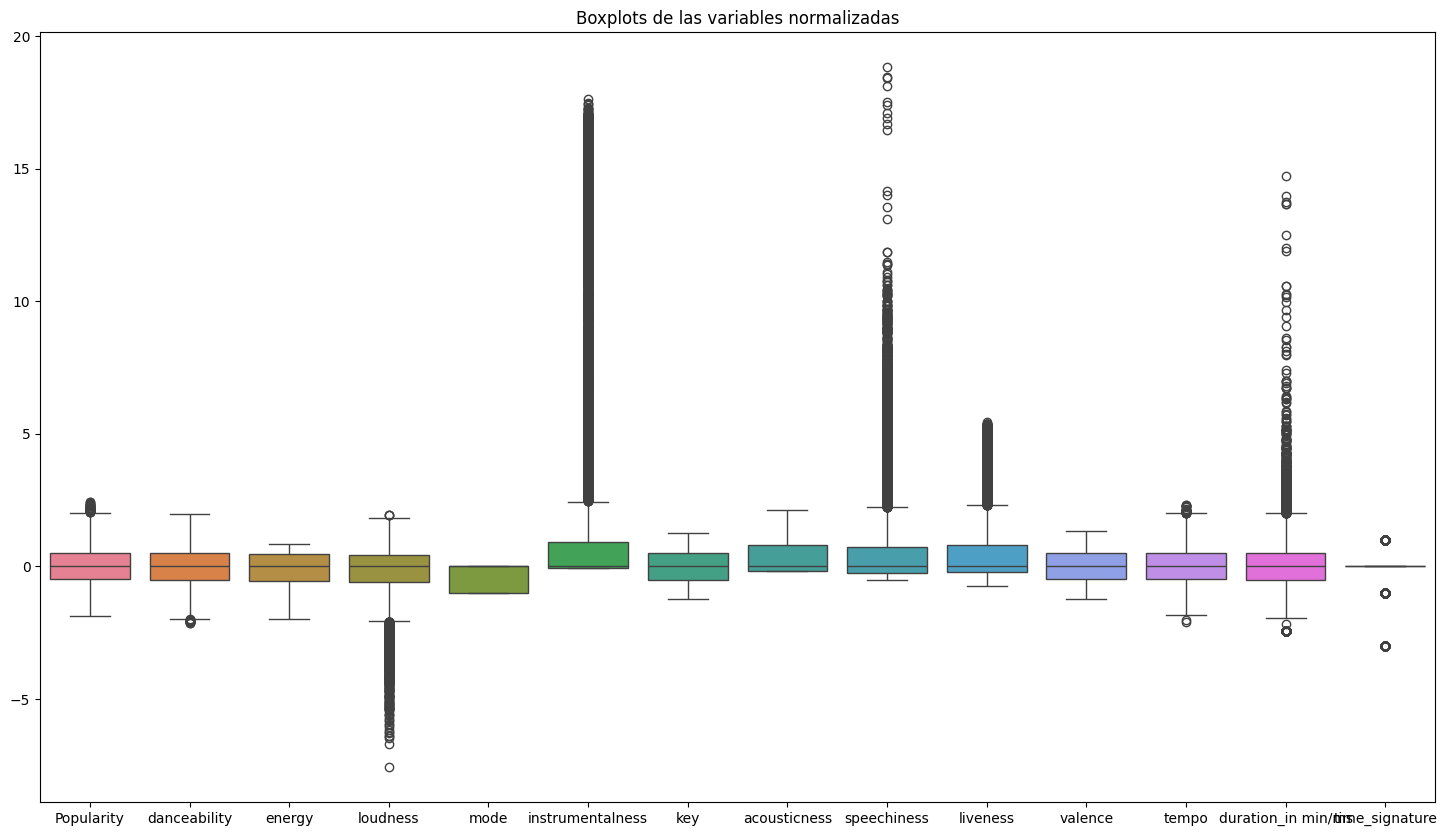

In [79]:
plt.figure(figsize=(18,10))
plt.title('Boxplots de las variables normalizadas')
sns.boxplot(data=df[['Popularity', 'danceability', 'energy','loudness', 'mode', 'instrumentalness', 'key', 'acousticness', 'speechiness','liveness','valence', 'tempo', 'duration_in min/ms','time_signature']])
plt.show()

Se compobó gráficamente que el proceso de normalización fue ejecutado.

# APLICACIÓN DE MODELOS DE CLASIFICACIÓN

Primeramente definiremos los modelos que se aplicarán para predecir las Class (géneros) de futuros registros y evaluar su desempeño:
- Decision Tree: Es un algoritmo simple pero que ofrece buenos resultados y es eficiente en cuánto al costo computacional.
-Random Forest Classifier: Es un método de ensamble de tipo Bagging: métodos donde los algoritmos simples son usados en paralelo con el fin de aprender con base en una estructura en paralelo de cada modelo individual.
-AdaBoost: Es un método de ensamble de tipo Boosting: combina un conjunto de modelos simples, uno debajo de otro, para minimizar los errores de entrenamiento. Se ajusta con un modelo y luego se entrena secuencialmente. Con cada iteración, las reglas débiles de cada clasificador individual se combinan para formar una regla de predicción fuerte.
- XG Boost: Este modelo, que también es de tipo Boosting, es uno de los modelos más utilizados en ciencia de datos dado su rendimiento para clasificaciones.

Como fundamento de la elección debemos recordar que el modelo intentará dar respuestas a ciertos problemas de clasificación, de modo que allí tenemos nuestro primer criterio, los algoritmos elegidos se aplican a clasificaciones. Luego se tuvo en cuenta que se cuenta con las diferentes clases en las que se puede efectuar la clasificación; dicho de otra forma, tenemos nuestra variable target y por tanto se aplicará aprendizaje supervisado. Finalmente, de las diferentes opciones que cumplen esas caraterísitcas se eligieron algoritmos que son diferentes entre si dado que aplican procesos diferentes, para poder cubrir un mayor espectro de posibilidades.

## Feature Selection

Dada la cantidad de variables (13) con las que va a trabajar el modelo, se considera que no es necesario aplicar una técnica de transformación como PCA (principal component analysis) que es compleja y costosa operacionalmente, pero si se aplicará alguna ténica de reducción de dimensionalidad para intentar trabajar con la menor cantidad de variables posibles sin perder la variabilidad de los datos, reteniendo sus caraterísticas significativas. De esa forma, se reduce el costo computacional y se evita el overfitting y la multicolinealidad.

Comenzamos definiendo nuestras variables X, para lo cual eliminamos "Artist Name" y "Track Name" dado que no son de utilidad en el modelo, "energy" para evitar la multicolinealidad y, lógicamente, la variable target "y":

In [80]:
X = df.drop(['Artist Name', 'Track Name', 'energy', 'Class'], axis=1)
y = df['Class']

In [81]:
X.shape

(17996, 13)

In [82]:
y.shape

(17996,)

Aplicaremos el método LDA (linear discriminant analysis) para reducir la dimensionalidad. Este algoritmo supervisado es muy adecuado para modelos de predicción multi clase, como es en este caso. Para ello, aplicaremos también un técnica de tuneo de hiperparámetros, que busca la mejor combinación de los mismos para mejorar la performance del método LDA.

In [83]:
pipeline = Pipeline([
    ('lda', LinearDiscriminantAnalysis())
])

In [84]:
param_grid = {
    'lda__n_components': [2,3,4,5,6,7,8,9,10],
    'lda__solver': ['svd', 'eigen'],
    'lda__shrinkage': [None, 'auto']
}

In [85]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [86]:
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('lda', LinearDiscriminantAnalysis())]),
             param_grid={'lda__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'lda__shrinkage': [None, 'auto'],
                         'lda__solver': ['svd', 'eigen']})

In [87]:
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'lda__n_components': 2, 'lda__shrinkage': 'auto', 'lda__solver': 'eigen'}


Se aplica el algoritmo LDA con los mejores parámetros encontrados:

In [88]:
lda = LinearDiscriminantAnalysis(n_components=2, shrinkage= 'auto', solver='eigen')
X_lda = lda.fit_transform(X, y)

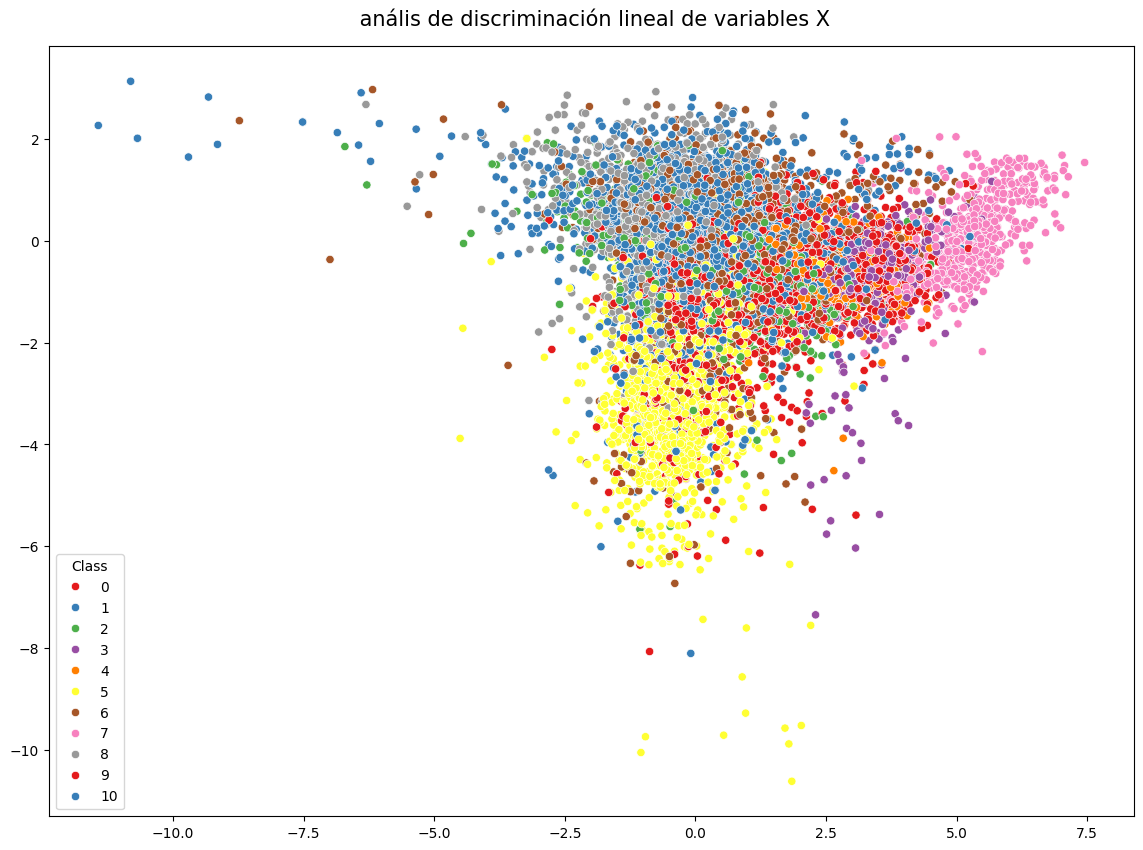

In [89]:
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y, palette='Set1')
plt.title(' anális de discriminación lineal de variables X', fontsize=15, pad=15)
plt.show()

Dada la cantidad de clases que componen el modelo, no fue posible visualizar claramente la separación de clases.

##Ejecución de los algoritmos de clasificación

Instanciamos los algoritmos con sus hiperparámetros (obtenidos del proceso de hypertuning parameter):

In [90]:
modelo1= DecisionTreeClassifier(splitter= 'best', random_state= 42, min_samples_split= 3, min_samples_leaf=2, max_features= 'sqrt', max_depth= 10, criterion='gini', class_weight='balanced')
modelo2= RandomForestClassifier(n_estimators=50, min_samples_split = 5, min_samples_leaf= 2, max_features='log2', max_depth= 10, criterion ='gini', class_weight='balanced', random_state=42)
modelo3= AdaBoostClassifier(n_estimators=10, random_state=42,learning_rate = 1.0, algorithm = 'SAMME.R',base_estimator= DecisionTreeClassifier(max_depth=1) )
modelo4=XGBClassifier(scale_pos_weight= 1, random_state= 42, objective= 'multi:softprob', num_class= 10, n_estimators= 50,min_child_weight= 3, max_depth= 5,gamma= 1,eval_metric= 'mlogloss', eta= 0.1, booster= 'gbtree')

## Comencemos ejecutando los algoritmos sobre las variables obtenidas mediante LDA:

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

In [92]:
dtc = modelo1.fit(X_train, y_train)

In [93]:
y_pred= dtc.predict(X_test)

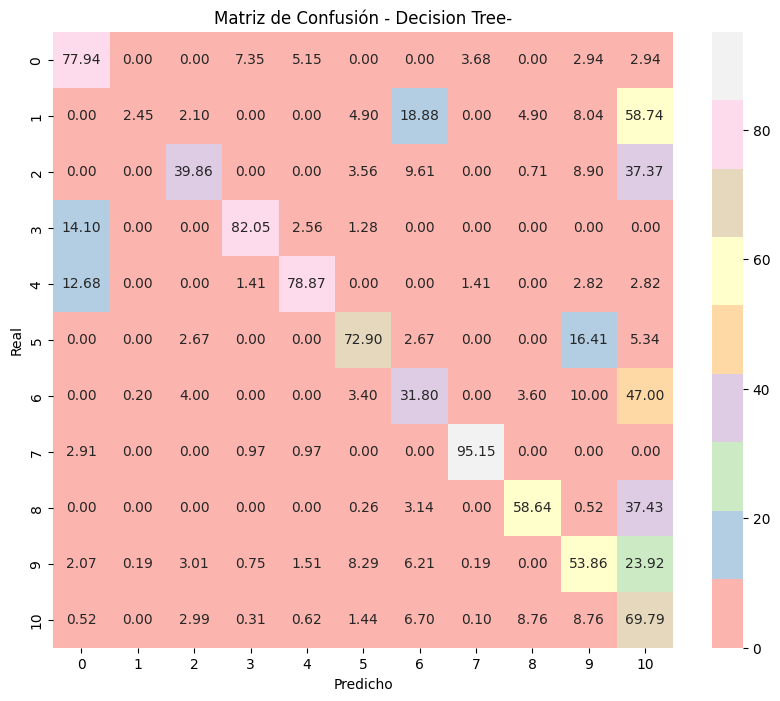

In [143]:
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cm_df = pd.DataFrame(cm_percentage, index=range(11), columns=range(11))
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Pastel1", xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Decision Tree-')
plt.show()

In [95]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.33      0.26      0.29       136
           1       0.12      0.29      0.17       286
           2       0.10      0.06      0.07       281
           3       0.28      0.53      0.36        78
           4       0.16      0.66      0.25        71
           5       0.52      0.68      0.59       262
           6       0.26      0.06      0.09       500
           7       0.82      0.84      0.83       103
           8       0.26      0.67      0.38       382
           9       0.30      0.21      0.25       531
          10       0.44      0.11      0.18       970

    accuracy                           0.28      3600
   macro avg       0.33      0.40      0.31      3600
weighted avg       0.33      0.28      0.25      3600



In [96]:
rfc= modelo2.fit(X_train, y_train)

In [97]:
y_pred= rfc.predict(X_test)

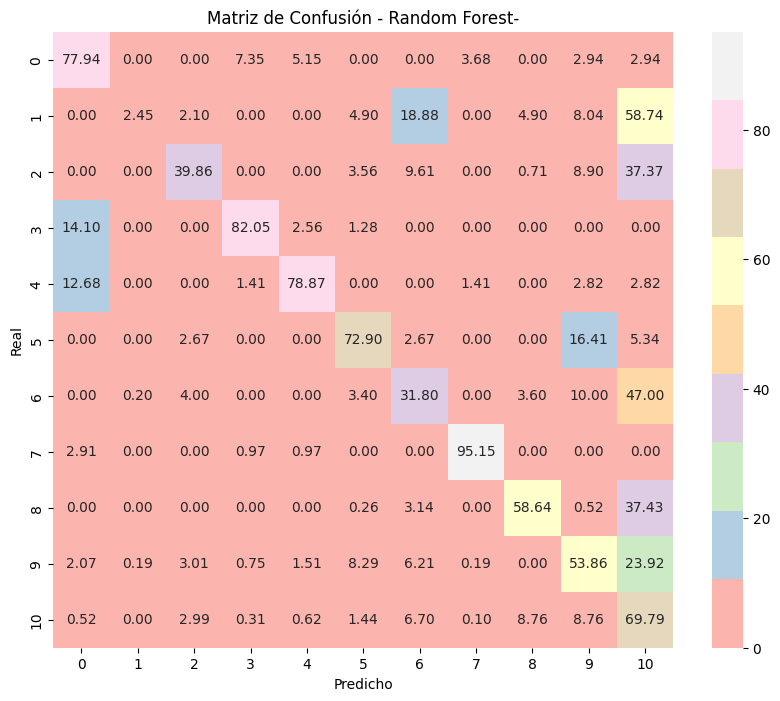

In [144]:
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cm_df = pd.DataFrame(cm_percentage, index=range(11), columns=range(11))
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Pastel1", xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest-')
plt.show()

In [99]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.36      0.38      0.37       136
           1       0.13      0.21      0.16       286
           2       0.10      0.04      0.05       281
           3       0.33      0.55      0.41        78
           4       0.16      0.58      0.25        71
           5       0.56      0.70      0.62       262
           6       0.25      0.09      0.14       500
           7       0.85      0.90      0.87       103
           8       0.28      0.62      0.39       382
           9       0.32      0.38      0.35       531
          10       0.41      0.18      0.25       970

    accuracy                           0.32      3600
   macro avg       0.34      0.42      0.35      3600
weighted avg       0.33      0.32      0.29      3600



In [100]:
abc= modelo3.fit(X_train, y_train)

In [101]:
y_pred= abc.predict(X_test)

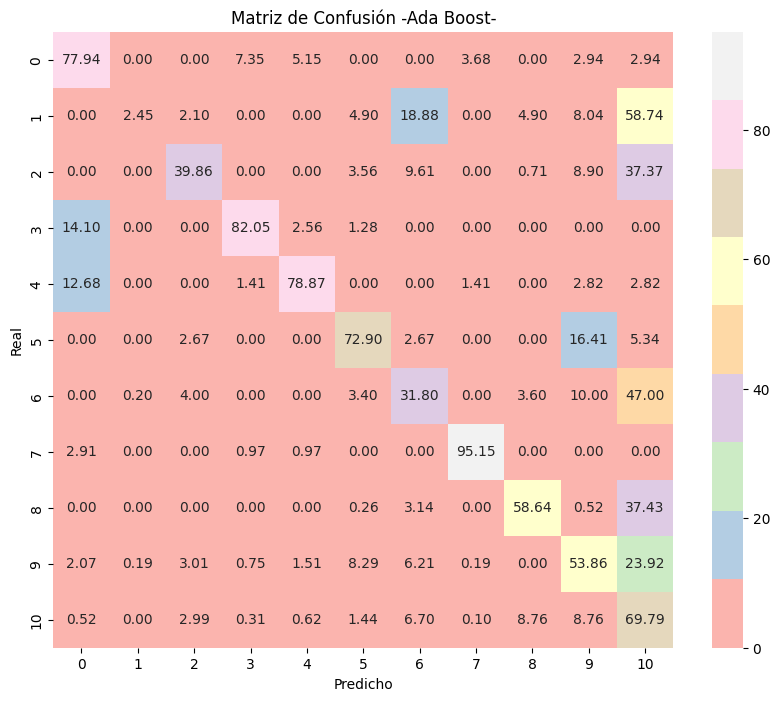

In [145]:
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cm_df = pd.DataFrame(cm_percentage, index=range(11), columns=range(11))
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Pastel1", xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión -Ada Boost-')
plt.show()

In [103]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.37      0.54      0.44       136
           1       0.00      0.00      0.00       286
           2       0.00      0.00      0.00       281
           3       0.29      0.28      0.29        78
           4       0.00      0.00      0.00        71
           5       0.66      0.47      0.54       262
           6       0.21      0.01      0.02       500
           7       0.92      0.84      0.88       103
           8       0.23      0.53      0.32       382
           9       0.28      0.21      0.24       531
          10       0.31      0.54      0.39       970

    accuracy                           0.32      3600
   macro avg       0.30      0.31      0.28      3600
weighted avg       0.27      0.32      0.26      3600



In [104]:
xgb= modelo4.fit(X_train, y_train)

In [105]:
y_pred= xgb.predict(X_test)

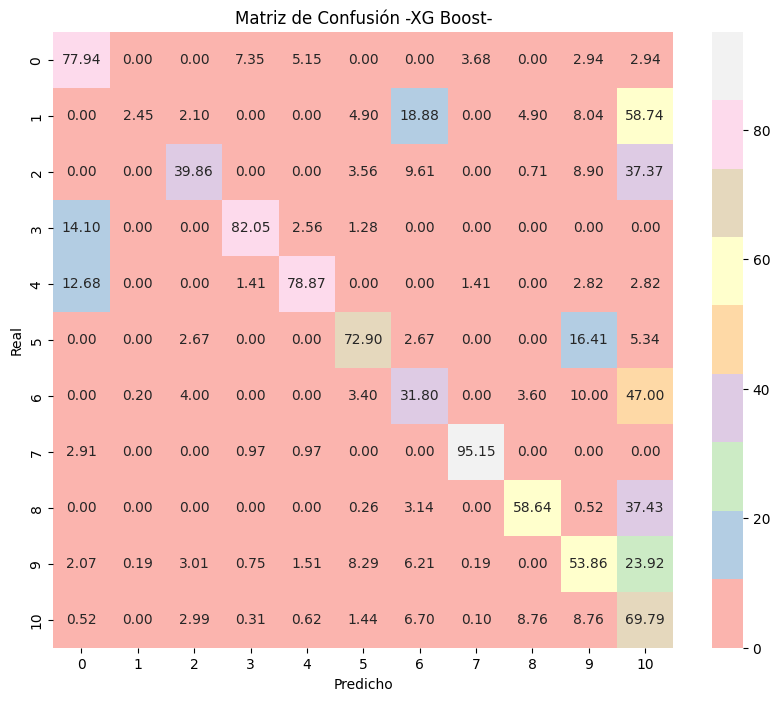

In [146]:
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cm_df = pd.DataFrame(cm_percentage, index=range(11), columns=range(11))
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Pastel1", xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión -XG Boost-')
plt.show()

In [107]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.39      0.65      0.49       136
           1       0.40      0.01      0.01       286
           2       0.20      0.00      0.01       281
           3       0.36      0.23      0.28        78
           4       0.35      0.11      0.17        71
           5       0.59      0.68      0.63       262
           6       0.22      0.04      0.07       500
           7       0.81      0.86      0.84       103
           8       0.38      0.09      0.14       382
           9       0.32      0.41      0.36       531
          10       0.37      0.78      0.51       970

    accuracy                           0.39      3600
   macro avg       0.40      0.35      0.32      3600
weighted avg       0.36      0.39      0.31      3600



## Ahora ejecutamos los modelos sobre las 13 variables dependientes originales, para poder comparar la efectividad de los modelos en ambas situaciones:

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
dtc = modelo1.fit(X_train, y_train)

In [110]:
y_pred= dtc.predict(X_test)

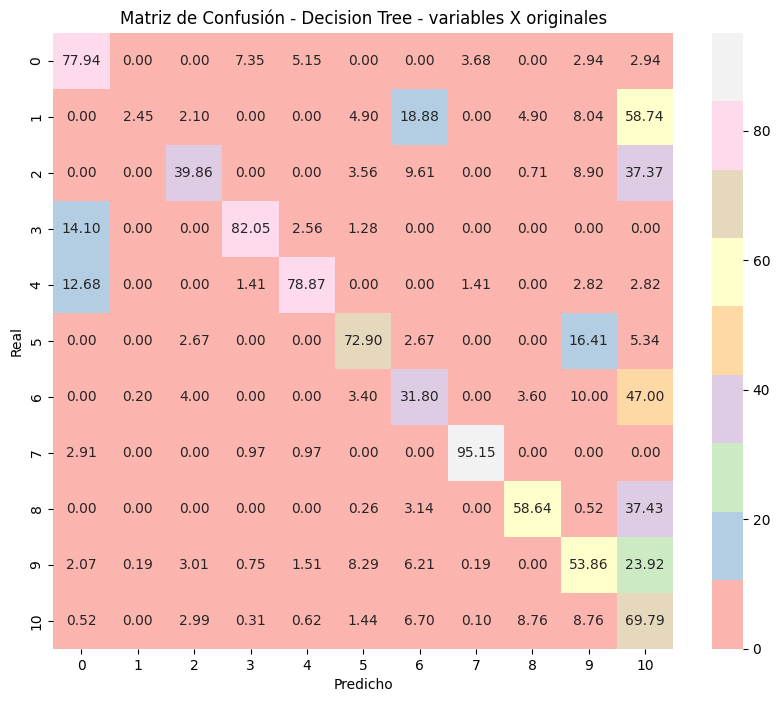

In [147]:
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cm_df = pd.DataFrame(cm_percentage, index=range(11), columns=range(11))
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Pastel1", xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Decision Tree - variables X originales')
plt.show()

In [112]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       136
           1       0.13      0.19      0.16       286
           2       0.27      0.51      0.35       281
           3       0.36      0.55      0.44        78
           4       0.41      0.72      0.53        71
           5       0.55      0.56      0.56       262
           6       0.32      0.22      0.26       500
           7       0.85      0.83      0.84       103
           8       0.44      0.64      0.52       382
           9       0.41      0.39      0.40       531
          10       0.43      0.23      0.30       970

    accuracy                           0.39      3600
   macro avg       0.43      0.50      0.45      3600
weighted avg       0.40      0.39      0.38      3600



In [113]:
rfc= modelo2.fit(X_train, y_train)

In [114]:
y_pred= rfc.predict(X_test)

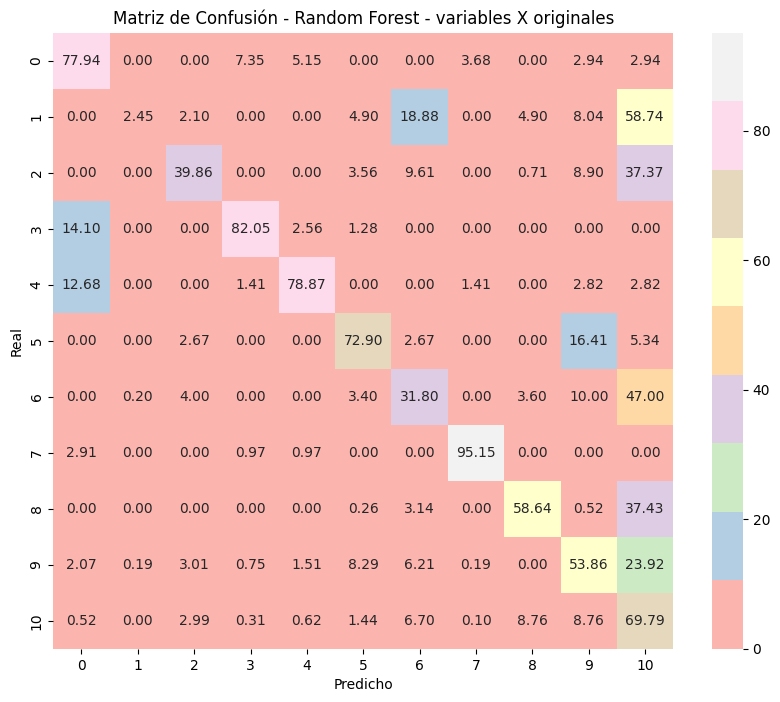

In [148]:
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cm_df = pd.DataFrame(cm_percentage, index=range(11), columns=range(11))
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Pastel1", xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest - variables X originales')
plt.show()

In [116]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75       136
           1       0.16      0.11      0.13       286
           2       0.36      0.70      0.48       281
           3       0.73      0.82      0.77        78
           4       0.50      0.86      0.63        71
           5       0.63      0.72      0.67       262
           6       0.39      0.28      0.33       500
           7       0.92      0.89      0.91       103
           8       0.47      0.79      0.59       382
           9       0.47      0.51      0.49       531
          10       0.48      0.24      0.32       970

    accuracy                           0.47      3600
   macro avg       0.52      0.62      0.55      3600
weighted avg       0.47      0.47      0.45      3600



In [117]:
abc= modelo3.fit(X_train, y_train)

In [118]:
y_pred= abc.predict(X_test)

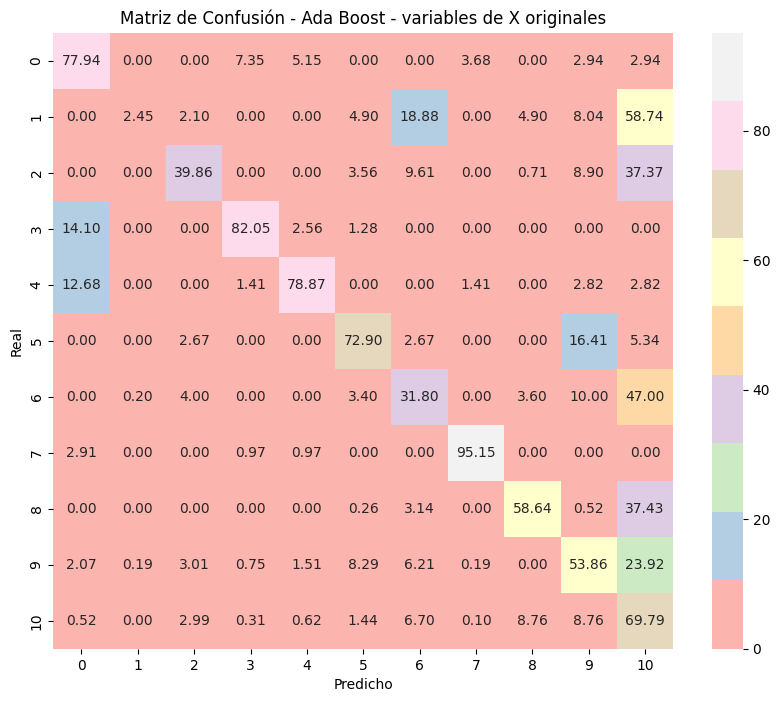

In [149]:
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cm_df = pd.DataFrame(cm_percentage, index=range(11), columns=range(11))
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Pastel1", xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Ada Boost - variables de X originales')
plt.show()

In [120]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.00      0.00      0.00       286
           2       0.00      0.00      0.00       281
           3       0.00      0.00      0.00        78
           4       0.00      0.00      0.00        71
           5       0.64      0.59      0.61       262
           6       0.31      0.28      0.29       500
           7       0.00      0.00      0.00       103
           8       0.44      0.54      0.48       382
           9       0.30      0.35      0.32       531
          10       0.35      0.66      0.46       970

    accuracy                           0.37      3600
   macro avg       0.19      0.22      0.20      3600
weighted avg       0.27      0.37      0.31      3600



In [121]:
xgb= modelo4.fit(X_train, y_train)

In [122]:
y_pred= xgb.predict(X_test)

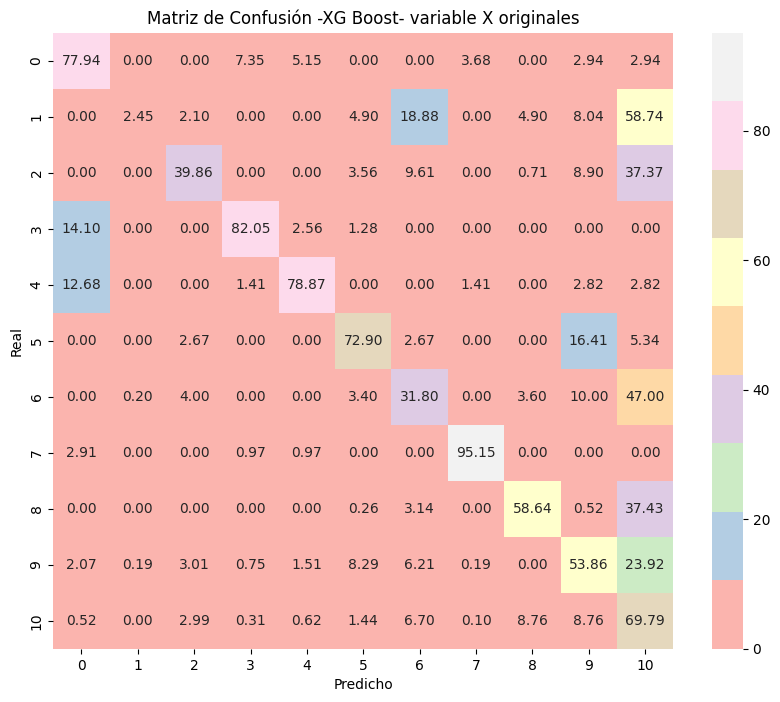

In [150]:
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cm_df = pd.DataFrame(cm_percentage, index=range(11), columns=range(11))
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Pastel1", xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión -XG Boost- variable X originales')
plt.show()

In [124]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       136
           1       0.78      0.02      0.05       286
           2       0.59      0.40      0.48       281
           3       0.77      0.82      0.80        78
           4       0.70      0.79      0.74        71
           5       0.65      0.73      0.69       262
           6       0.45      0.32      0.37       500
           7       0.92      0.95      0.94       103
           8       0.65      0.59      0.62       382
           9       0.55      0.54      0.54       531
          10       0.46      0.70      0.55       970

    accuracy                           0.55      3600
   macro avg       0.66      0.60      0.59      3600
weighted avg       0.58      0.55      0.52      3600



Se observó que Decision Tree y Random Forest performaron mejor cuando se tomaron las variables originales del dataset (normalizadas), no así en el caso de Ada Boost Clasifier, que performó mejor con las variables obtenidas en LDA y XG Boost que performó de forma similar en ambos casos.
En línea con lo anterior, mediante el gráfico siguiente visualizamos cuál es la importancia relativa de cada una de esas 14 variables en la predicción del modelo Random Forest, que fue la más efectiva en sus predicciones:

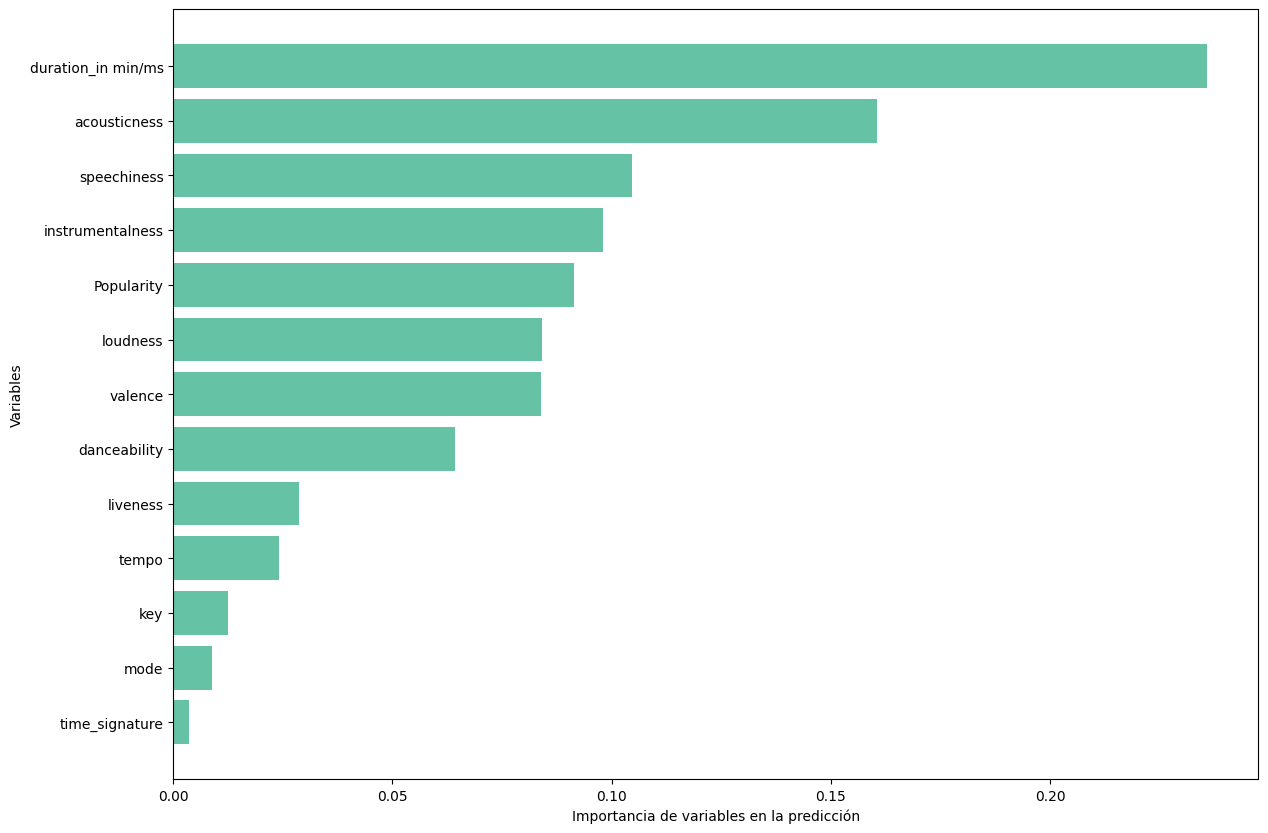

In [125]:
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Importancia de variables en la predicción")
plt.ylabel("Variables")
plt.show()

Esta información nos  puede ser de utilidad a efectos de reducir la dimensionalidad del modelo de predicción, al tomar sólo las variables más importantes sin perder capacidad de predicción.

# HYPERTUNING PARAMETER

El Hypertuning Parameter permite definir cuáles son los mejores hiperparámetros de un modelo de predicción para maximizar su eficacia. Para efectuar dicho tuneo se utilizará el método Halving Randomized Search, dado que combina alta precisión, menor costo computacional y menor probabilidad de cometer overfitting.

## definimos la grilla de parámetros y tuneo para Random Forest:

In [126]:
params_grid_rfc = {
        'n_estimators': [5, 10,50],
         'min_samples_split': [1,2,3,4,5,6,7,8,9,10],
        'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
        'max_features': ['auto','log2','sqrt'],
        'max_depth': [3,5,10],
        'criterion':['entropy','gini'],
        'random_state': [42]
         }

In [127]:
halving_rfc = HalvingRandomSearchCV(modelo2, params_grid_rfc, scoring="accuracy", factor=3,random_state=42)

In [128]:
halving_rfc.fit(X_train, y_train)
print("Mejores parametros", halving_rfc.best_params_)
print("Mejor CV score", halving_rfc.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, halving_rfc.predict(X_test)), 5)}')

Mejores parametros {'random_state': 42, 'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}
Mejor CV score 0.47653274903883175
Accuracy del modelo = 0.47111


## definimos la grilla de parámetros y tuneo de Ada Boost:

In [129]:
params_grid_abc = {
        'n_estimators': [5, 10,50],
        'learning_rate': [0.5,1.0,2.0,3.0],
        'algorithm': ['SAMME','SAMME.R'],
        'random_state': [42],
         'base_estimator': [DecisionTreeClassifier(max_depth=1)]
         }

In [130]:
halving_abc= HalvingRandomSearchCV(modelo3, params_grid_abc, scoring="accuracy", factor=3, random_state=42)

In [131]:
halving_abc.fit(X_train, y_train)
print("Mejores parametros", halving_abc.best_params_)
print("Mejor CV score", halving_abc.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, halving_abc.predict(X_test)), 5)}')

Mejores parametros {'random_state': 42, 'n_estimators': 10, 'learning_rate': 1.0, 'base_estimator': DecisionTreeClassifier(max_depth=1), 'algorithm': 'SAMME.R'}
Mejor CV score 0.347869558529457
Accuracy del modelo = 0.3675


## definimos la grilla de parámetros y tuneo de Decision Tree:

In [132]:
params_grid_dtc = {
        'splitter': ['best', 'random'],
        'min_samples_split': [1,2,3,4,5,6,7,8,9,10],
        'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
        'max_features': ['auto','log2','sqrt'],
        'max_depth': [3,5,10],
        'criterion':['entropy','gini'],
        'random_state': [42]
         }

In [133]:
halving_dtc = HalvingRandomSearchCV(modelo1, params_grid_dtc, scoring="accuracy", factor=3, random_state=42)

In [134]:
halving_dtc.fit(X_train, y_train)
print("Mejores parametros", halving_dtc.best_params_)
print("Mejor CV score", halving_dtc.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, halving_dtc.predict(X_test)), 5)}')

Mejores parametros {'splitter': 'best', 'random_state': 42, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}
Mejor CV score 0.3690752430411798
Accuracy del modelo = 0.38667


## definimos la grilla de parámetros y tuneo de XG Boost:

In [135]:
params_grid_xgb = {
        'booster': ['gbtree', 'gblinear','dart'],
        'eta': [0.01, 0.05,0.1,0.3],
        'min_child_weight': [1,2,3,4,5],
        'gamma': [0,1,2],
        'max_depth': [3,5,10],
        'scale_pos_weight':[1,2,3,4,5],
        'n_estimators': [5, 10,50],
        'objective': ['multi:softmax','multi:softprob'],
        'num_class': [10],
        'eval_metric': ['mlogloss'],
        'random_state': [42]
         }

In [136]:
halving_xgb = HalvingRandomSearchCV(modelo4, params_grid_xgb, scoring="accuracy", factor=3, random_state=42)

In [137]:
halving_xgb.fit(X_train, y_train)
print("Mejores parametros", halving_xgb.best_params_)
print("Mejor CV score", halving_xgb.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, halving_xgb.predict(X_test)), 5)}')

Mejores parametros {'scale_pos_weight': 1, 'random_state': 42, 'objective': 'multi:softprob', 'num_class': 10, 'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 5, 'gamma': 1, 'eval_metric': 'mlogloss', 'eta': 0.1, 'booster': 'gbtree'}
Mejor CV score 0.537502796383575
Accuracy del modelo = 0.55


Una vez definidos dichos hiperparámetros se insertaron en la instanciación de los diferentes modelos y se ejecutaron las predicciones, obteniendo en todos los casos mejores resultados que los obtenidos con hiperparámetros definidos al azar.

# VALIDACIÓN CRUZADA

Instanciados y entrenados ya los cuatro modelos sobre los datos de entrenamiento, es importante validar dichos modelos para comprender como se desempeñarían los mismos sobre datos diferentes a los de entrenamiento. En este modelo en particular se optó por aplicar Stratified K Fold, dada su robustez, que nos permite definir la cantidad de iteraciones (lo cual contiene la variabilidad y el costo computacional) y, finalmente, a que dentro de cada "fold" mantiene la proporción de clases, lo cual es importante dado que nuestras clases estan desbalanceadas en la variable target. Procedemos a instanciar y validar los 4 modelos:

In [138]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [139]:
scores_dtc = cross_val_score(modelo1, X, y, cv=skf)
print(f'Accuracy scores por cada pliegue: {scores_dtc}')
print(f'Accuracy promedio: {scores_dtc.mean()}')
print(f'Desv Estándar: {scores_dtc.std()}')

Accuracy scores por cada pliegue: [0.36083333 0.34815226 0.35898861 0.38010558 0.38038344]
Accuracy promedio: 0.36569264610539964
Desv Estándar: 0.01264732587879759


In [140]:
scores_rfc = cross_val_score(modelo2, X, y, cv=skf)

print(f'Accuracy scores por cada pliegue: {scores_rfc}')
print(f'Accuracy promedio: {scores_rfc.mean()}')
print(f'Desv Estándar: {scores_rfc.std()}')

Accuracy scores por cada pliegue: [0.47055556 0.46818561 0.46457349 0.46262851 0.47457627]
Accuracy promedio: 0.46810388688215865
Desv Estándar: 0.004250942822047674


In [141]:
scores_abc = cross_val_score(modelo3, X, y, cv=skf)

print(f'Accuracy scores por cada pliegue: {scores_abc}')
print(f'Accuracy promedio: {scores_abc.mean()}')
print(f'Desv Estándar: {scores_abc.std()}')

Accuracy scores por cada pliegue: [0.38583333 0.34981939 0.35732148 0.36621284 0.38399555]
Accuracy promedio: 0.36863651940353803
Desv Estándar: 0.01428018876319205


In [142]:
scores_xgb = cross_val_score(modelo4, X, y, cv=skf)

print(f'Accuracy scores por cada pliegue: {scores_xgb}')
print(f'Accuracy promedio: {scores_xgb.mean()}')
print(f'Desv Estándar: {scores_xgb.std()}')

Accuracy scores por cada pliegue: [0.55138889 0.55293137 0.53820506 0.54320645 0.54570714]
Accuracy promedio: 0.5462877805563273
Desv Estándar: 0.0053911180466186025


La validación mostró que para datos nuevos sólo el modelo XG Boost podría modestamente predecir clases, mostrando un accuracy medio de 54.6%.
Por otro lado, se compararon los diferentes accuracy promedio en la validación con los obtenidos en el entrenamiento, y se observó que si bien no performan adecuadamente el motivo de ello no sería un problema de overfitting o underfitting, dado que los valores son similiares.

# INSIGHTS - RECOMENDACIONES

Del estudio de los resultados de predicción sobre los datos de entrenamiento y de la interpretación de las matrices de confusión podemos ver que los mejores resultados - de entrenamiento - se obtuvieron con el modelo XGBoost, obteniendo las siguientes métricas: 66% en Precision, 60% en Recall y 59% en F1 Score. Por su parte, el algoritmo Random Forest Classifier obtuvo - tomando las 13 variables independientes originales- resultados algo inferiores: 52, 62 y 55%, respecitvamente, pero con tiempos de ejecución y un costo computacional sensiblemente más bajo. Es oportuno remarcar que no consideramos accuracy como métrica de evaluación dado que, como se dijo, tenemos un desbalance de clases en la variable target y por tanto en dichas condiciones no es una métrica adecuada.
 En términos generales, podemos decir que de los cuatro sólo estos dos modelos mencionados cumplen el objetivo de predecir clases, pero -y esto es imporante remarcar- se obtuvieron resultados de predicción modestos.
 Lo dicho nos invita a sugerir para futuros modelos algunas líneas que tiendan a mejorar los resultados obtenidos:
 - Mejoras en la obtención de datos, ya sea una mayor cantidad de registros o incrementando las variables de los mismos, quizás mediante el enriquecimiento con alguna otra fuente de datos (de diferentes aplicaciones de reproducción de música, por ejemplo).
 - Implementación de otros modelos predictivos, dado que hay varias opciones más además de las 4 implementadas cuyos algoritmos tienen arquitecturas diferentes.
 - Implementación de otros modelos de hypertuning, dado que a efectos practicos solo se implementó uno y existen, claro, otros que que podrían ofrecer resultados mejores.

# VALIDACIÓN DE HIPÓTESIS Y PREGUNTAS DE INTERÉS

En términos generales podemos decir que, si bien los resultados obtenidos por los algoritmos no fueron los mejores, las líneas de investigación que plantean las preguntas de interés son plenamente válidas. Si bien las líneas divisorias son algo borrososas, vemos que existen caracterísiticas y patrones en los diferentes géneros musicales que hacen que determinadas canciones pertenezcan a determinados géneros. También se observa que, indudablemente, algunos géneros representan mejor las preferencias de escuchas actuales que otros, dicho de otro modo, son más esuchados por las personas.

Ya aplicado y validado el modelo de predicción, se procede a verificar el cumplimiento - o no - de las  hipótesis planteadas:
- Se observó que el rock es uno de los dos géneros con más energía, junto con el "metal".
- No se osbervó una correlación fuerte entre la popularidad (como medida de preferencia del público) y "alegría" (medida por la valencia).
- Se osbervó que el pop es uno de los géneros mas populares, pero no es el de mayor popularidad.
- El hip hop tiene alta vocabularidad en sus canciones.
- Llamativamente el género acoustic no es el que arroja los mayores valores de acusticidad.
